# Gold Price Prediction
## EDA and Regression on GLD ETF Dataset

- **Goal:** Predict the closing price of GLD (Gold ETF) using market indicators
- **Dataset:** FINAL_USO.csv (2011 - 2018)
- **Target:** Close column (GLD ETF closing price)
- **Steps:** EDA - Outlier Detection - Correlation - Model Training - Comparison

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# EDA (Total 5 steps)
# 1. check duplicates, if present then remove them
# 2. check the missing values for numerical & categorical, and fill them
# 3. convert all categorical into numerical
# 4. apply feature scaling
# 5. if outliers are present, then remove them

## 1. Load Dataset

- Loaded the dataset using `pd.read_csv()`
- Used `head()`, `describe()`, `info()`, `shape`, `columns` to explore the data
- **Result:** 1718 rows, 81 columns - target is `Close` (GLD ETF price)

In [148]:
df = pd.read_csv("Dataset/FINAL_USO.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [149]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [151]:
df.shape

(1718, 81)

In [152]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

## 2. Missing Values and Duplicates

- Checked for missing values using `isnull().sum()`
- Plotted a heatmap to visually confirm no null values
- Checked duplicate rows using `duplicated().sum()`
- **Result:** 0 missing values, 0 duplicates - data is clean

In [153]:
# percentage of missing values
a = df.isnull().sum() / df.shape[0] * 100
a

Date             0.0
Open             0.0
High             0.0
Low              0.0
Close            0.0
                ... 
USO_High         0.0
USO_Low          0.0
USO_Close        0.0
USO_Adj Close    0.0
USO_Volume       0.0
Length: 81, dtype: float64

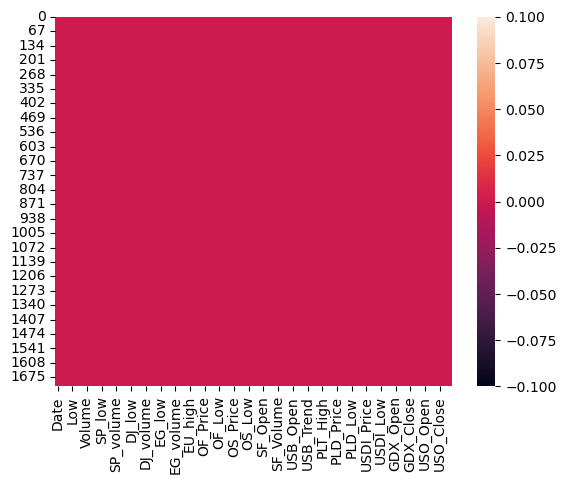

In [154]:
# missing value heatmap
sns.heatmap(df.isnull())
plt.show()

In [155]:
# Check for duplicates
total_dup = df.duplicated().sum()
print("Total duplicates:", total_dup)

Total duplicates: 0


## 3. EDA Visualizations

- Plotted GLD Close price trend over time (2011-2018)
- Plotted price trends of all 11 market features
- Distribution plots to check skewness of each feature
- Boxplots to see spread and median of each feature
- Bar chart to see how many stocks/markets went up or down

In [156]:
# Convert Date column to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df['Date'].dtype

dtype('<M8[ns]')

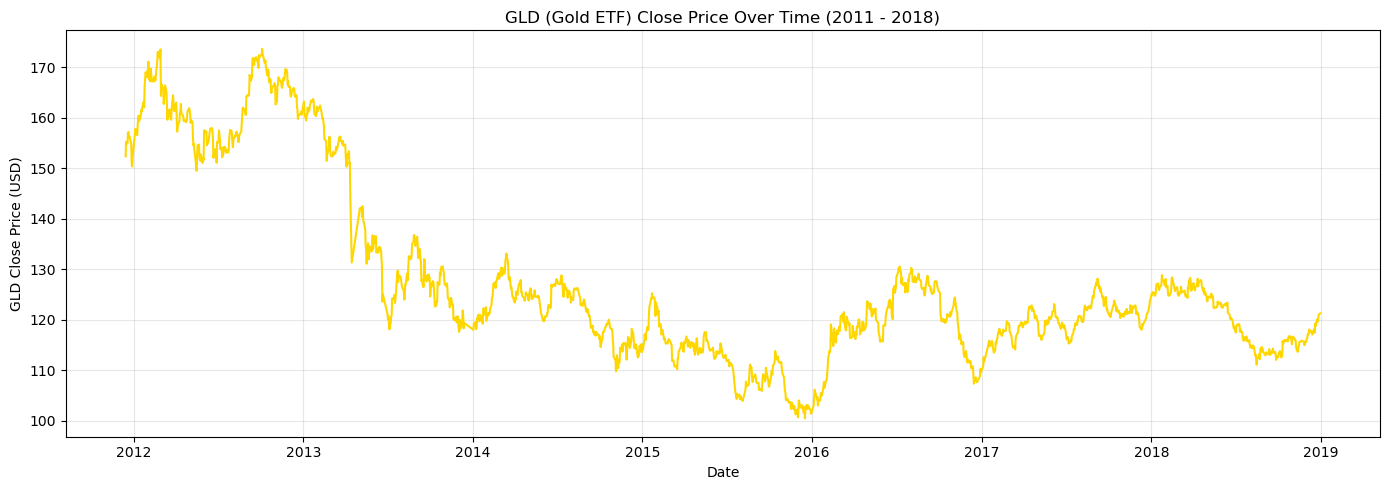

In [157]:
# GLD Close price trend over time (target feature)
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Close'], color='gold', linewidth=1.5)
plt.title('GLD (Gold ETF) Close Price Over Time (2011 - 2018)')
plt.xlabel('Date')
plt.ylabel('GLD Close Price (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

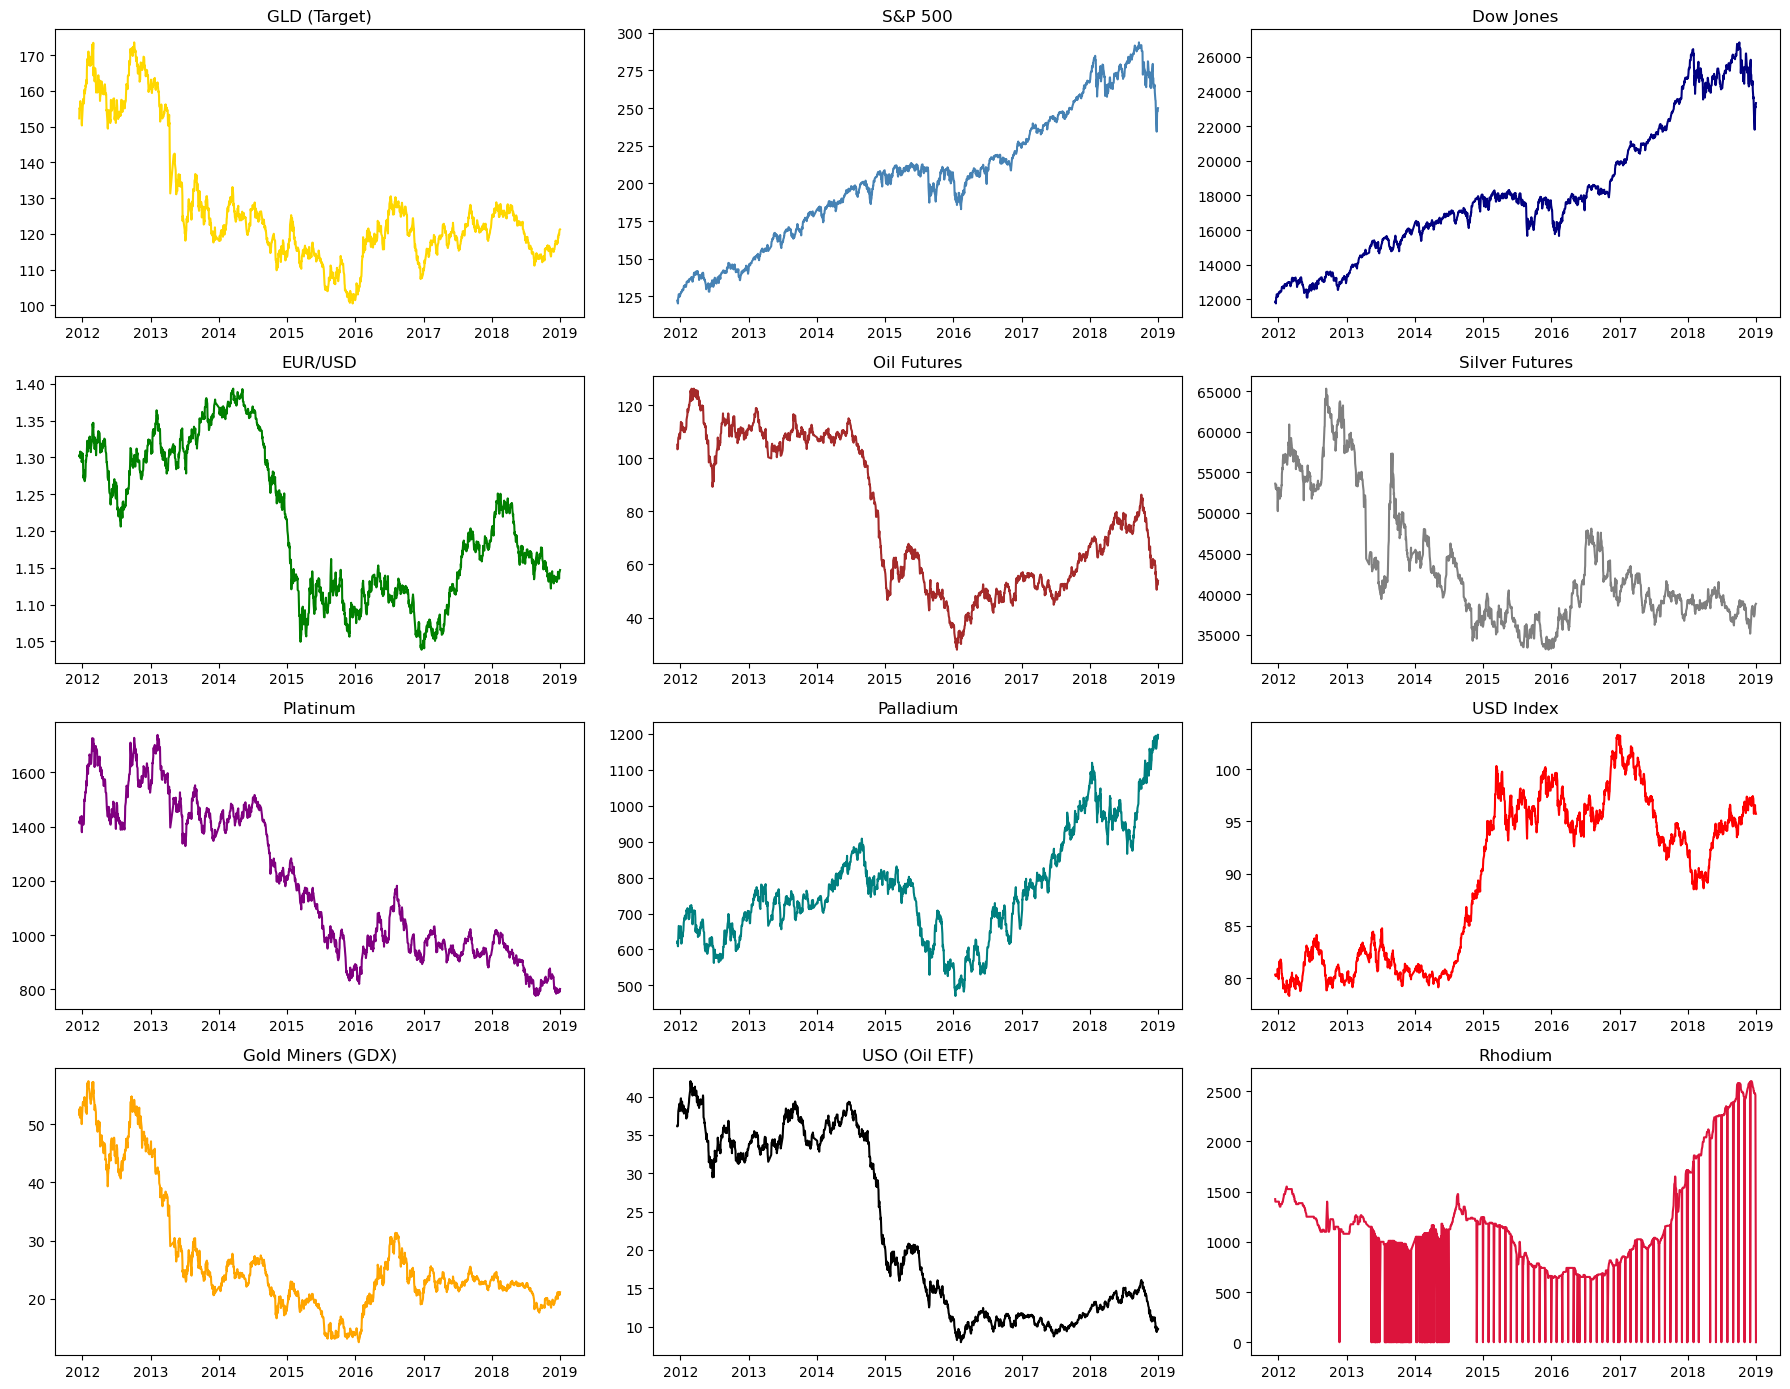

In [158]:
# price trend of key features over time
plt.figure(figsize=(18, 14))

plt.subplot(4, 3, 1)
plt.plot(df['Date'], df['Close'], color='gold')
plt.title("GLD (Target)")

plt.subplot(4, 3, 2)
plt.plot(df['Date'], df['SP_close'], color='steelblue')
plt.title("S&P 500")

plt.subplot(4, 3, 3)
plt.plot(df['Date'], df['DJ_close'], color='navy')
plt.title("Dow Jones")

plt.subplot(4, 3, 4)
plt.plot(df['Date'], df['EU_Price'], color='green')
plt.title("EUR/USD")

plt.subplot(4, 3, 5)
plt.plot(df['Date'], df['OF_Price'], color='brown')
plt.title("Oil Futures")

plt.subplot(4, 3, 6)
plt.plot(df['Date'], df['SF_Price'], color='gray')
plt.title("Silver Futures")

plt.subplot(4, 3, 7)
plt.plot(df['Date'], df['PLT_Price'], color='purple')
plt.title("Platinum")

plt.subplot(4, 3, 8)
plt.plot(df['Date'], df['PLD_Price'], color='teal')
plt.title("Palladium")

plt.subplot(4, 3, 9)
plt.plot(df['Date'], df['USDI_Price'], color='red')
plt.title("USD Index")

plt.subplot(4, 3, 10)
plt.plot(df['Date'], df['GDX_Close'], color='orange')
plt.title("Gold Miners (GDX)")

plt.subplot(4, 3, 11)
plt.plot(df['Date'], df['USO_Close'], color='black')
plt.title("USO (Oil ETF)")

plt.subplot(4, 3, 12)
plt.plot(df['Date'], df['RHO_PRICE'], color='crimson')
plt.title("Rhodium")

plt.tight_layout()
plt.show()

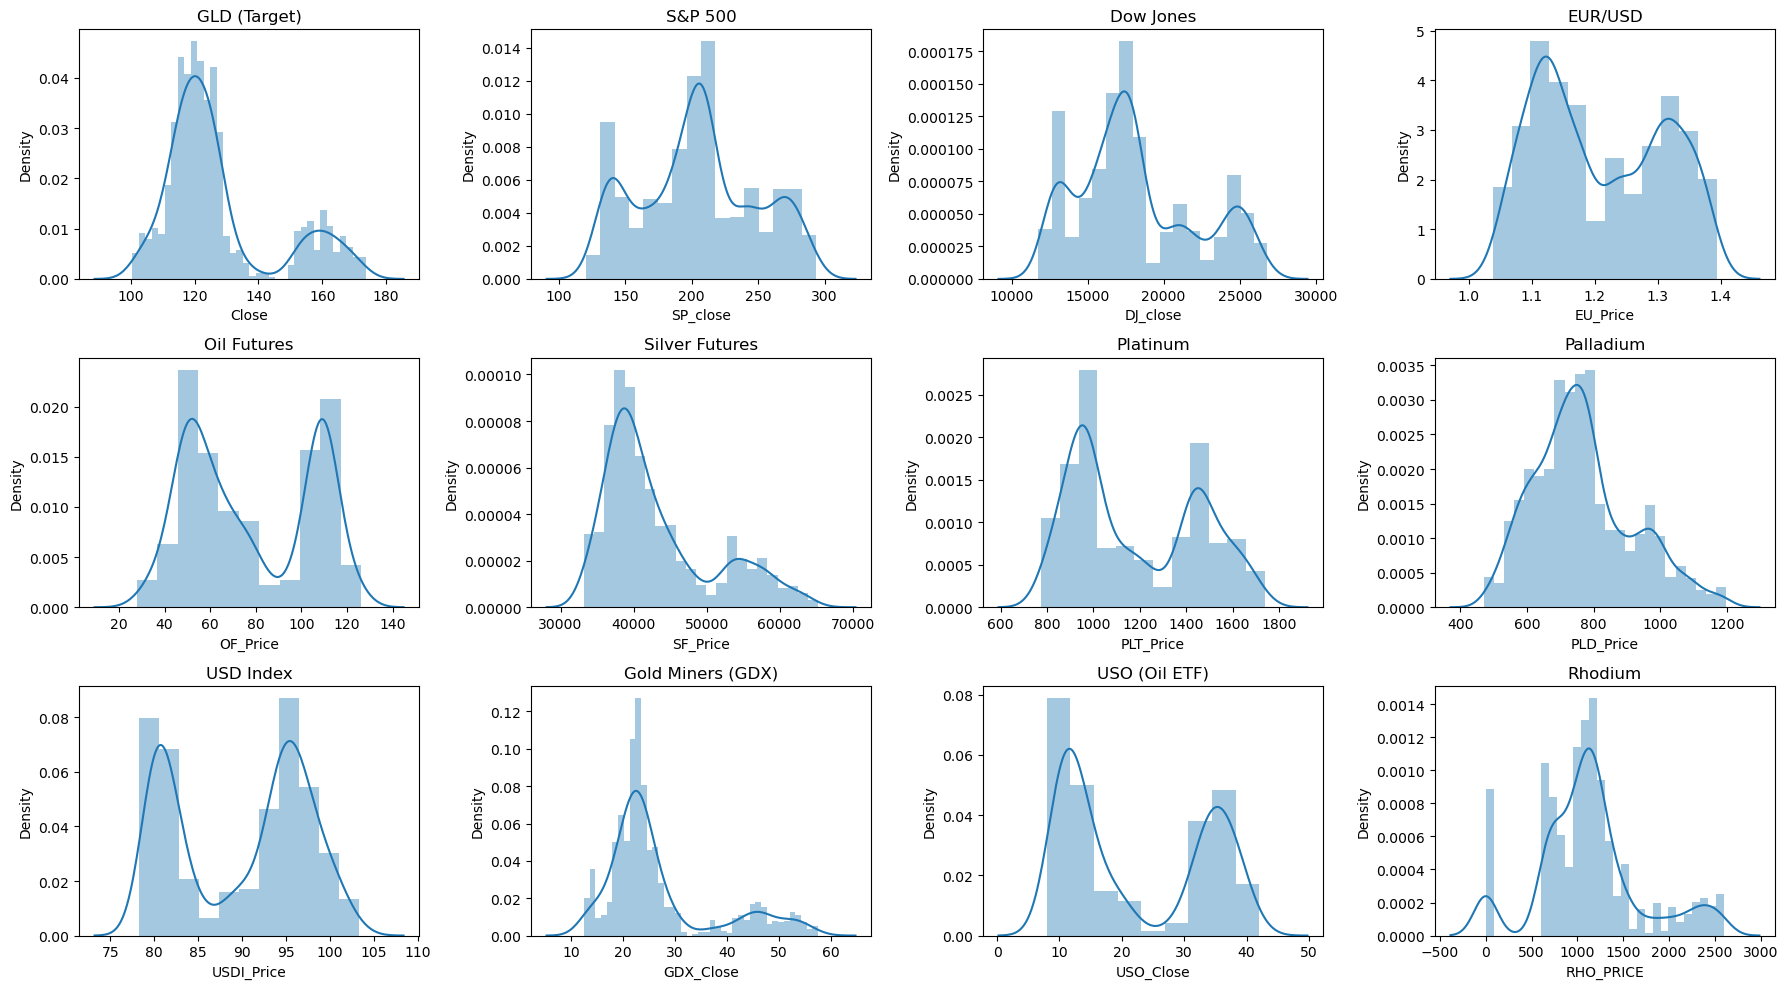

In [159]:
# distribution of key features
plt.figure(figsize=(18, 10))

plt.subplot(3, 4, 1)
sns.distplot(df['Close'])
plt.title("GLD (Target)")

plt.subplot(3, 4, 2)
sns.distplot(df['SP_close'])
plt.title("S&P 500")

plt.subplot(3, 4, 3)
sns.distplot(df['DJ_close'])
plt.title("Dow Jones")

plt.subplot(3, 4, 4)
sns.distplot(df['EU_Price'])
plt.title("EUR/USD")

plt.subplot(3, 4, 5)
sns.distplot(df['OF_Price'])
plt.title("Oil Futures")

plt.subplot(3, 4, 6)
sns.distplot(df['SF_Price'])
plt.title("Silver Futures")

plt.subplot(3, 4, 7)
sns.distplot(df['PLT_Price'])
plt.title("Platinum")

plt.subplot(3, 4, 8)
sns.distplot(df['PLD_Price'])
plt.title("Palladium")

plt.subplot(3, 4, 9)
sns.distplot(df['USDI_Price'])
plt.title("USD Index")

plt.subplot(3, 4, 10)
sns.distplot(df['GDX_Close'])
plt.title("Gold Miners (GDX)")

plt.subplot(3, 4, 11)
sns.distplot(df['USO_Close'])
plt.title("USO (Oil ETF)")

plt.subplot(3, 4, 12)
sns.distplot(df['RHO_PRICE'])
plt.title("Rhodium")

plt.tight_layout()
plt.show()

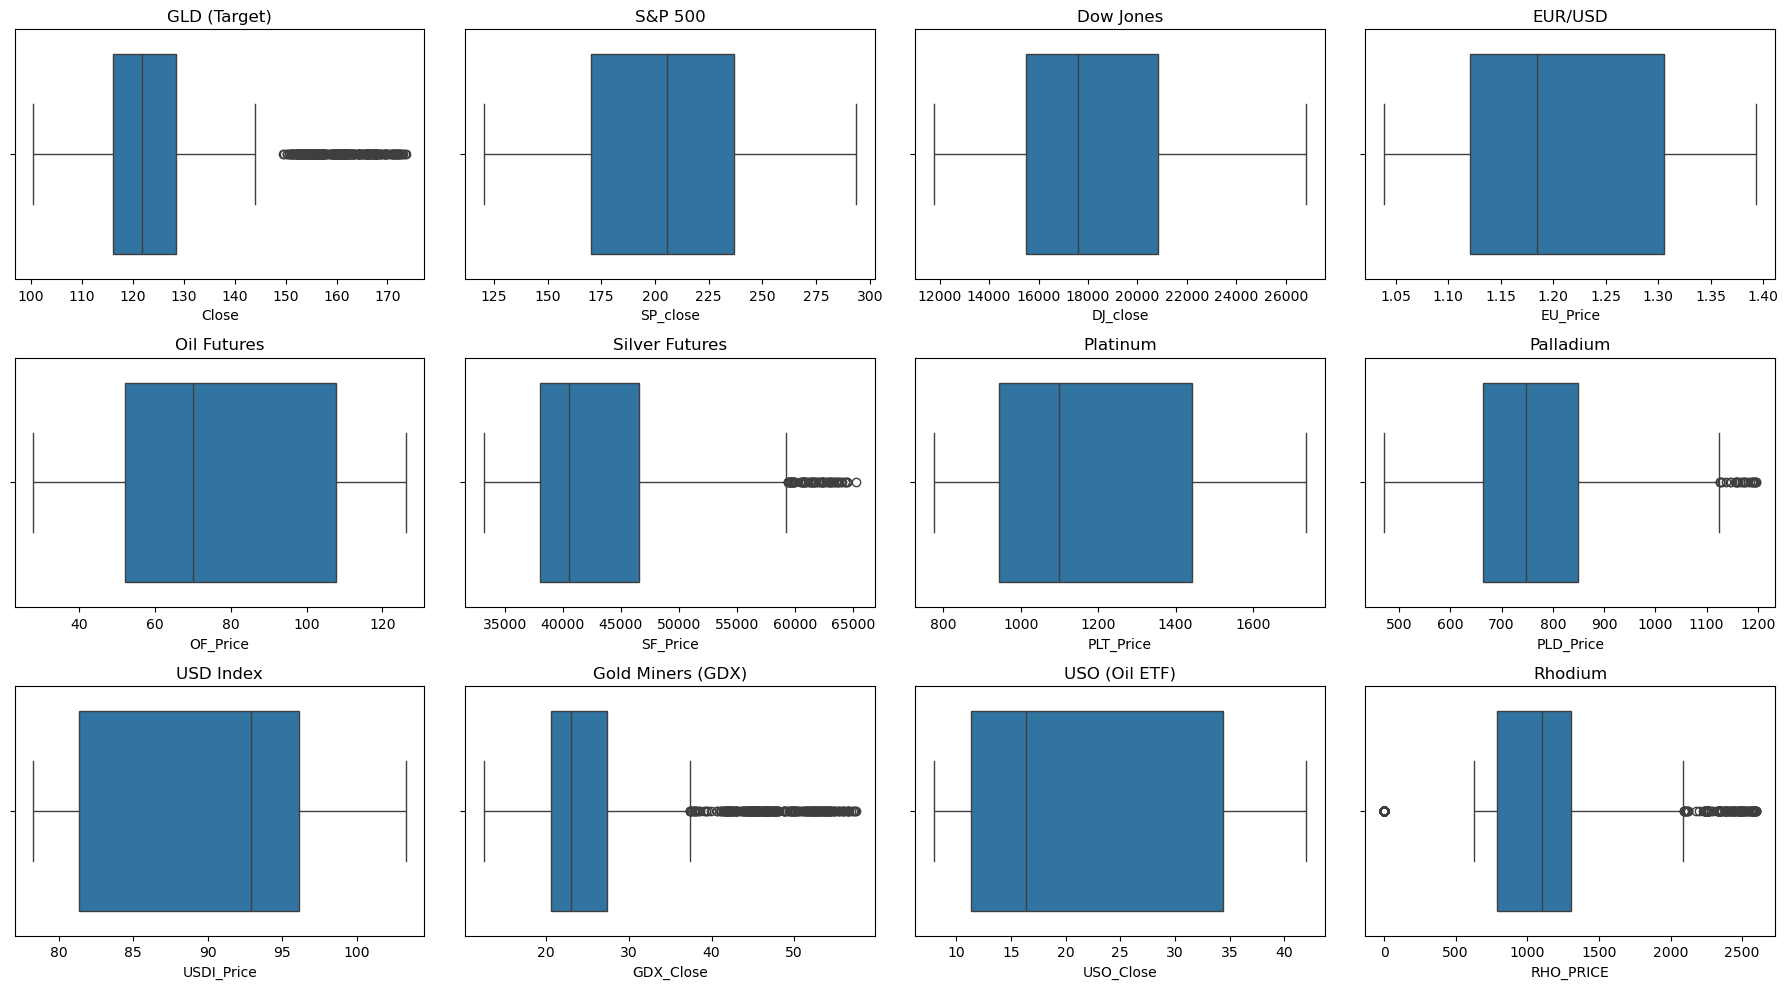

In [160]:
# boxplot for outlier detection of key features
plt.figure(figsize=(18, 10))

plt.subplot(3, 4, 1)
sns.boxplot(df['Close'], orient="h")
plt.title("GLD (Target)")

plt.subplot(3, 4, 2)
sns.boxplot(df['SP_close'], orient="h")
plt.title("S&P 500")

plt.subplot(3, 4, 3)
sns.boxplot(df['DJ_close'], orient="h")
plt.title("Dow Jones")

plt.subplot(3, 4, 4)
sns.boxplot(df['EU_Price'], orient="h")
plt.title("EUR/USD")

plt.subplot(3, 4, 5)
sns.boxplot(df['OF_Price'], orient="h")
plt.title("Oil Futures")

plt.subplot(3, 4, 6)
sns.boxplot(df['SF_Price'], orient="h")
plt.title("Silver Futures")

plt.subplot(3, 4, 7)
sns.boxplot(df['PLT_Price'], orient="h")
plt.title("Platinum")

plt.subplot(3, 4, 8)
sns.boxplot(df['PLD_Price'], orient="h")
plt.title("Palladium")

plt.subplot(3, 4, 9)
sns.boxplot(df['USDI_Price'], orient="h")
plt.title("USD Index")

plt.subplot(3, 4, 10)
sns.boxplot(df['GDX_Close'], orient="h")
plt.title("Gold Miners (GDX)")

plt.subplot(3, 4, 11)
sns.boxplot(df['USO_Close'], orient="h")
plt.title("USO (Oil ETF)")

plt.subplot(3, 4, 12)
sns.boxplot(df['RHO_PRICE'], orient="h")
plt.title("Rhodium")

plt.tight_layout()
plt.show()

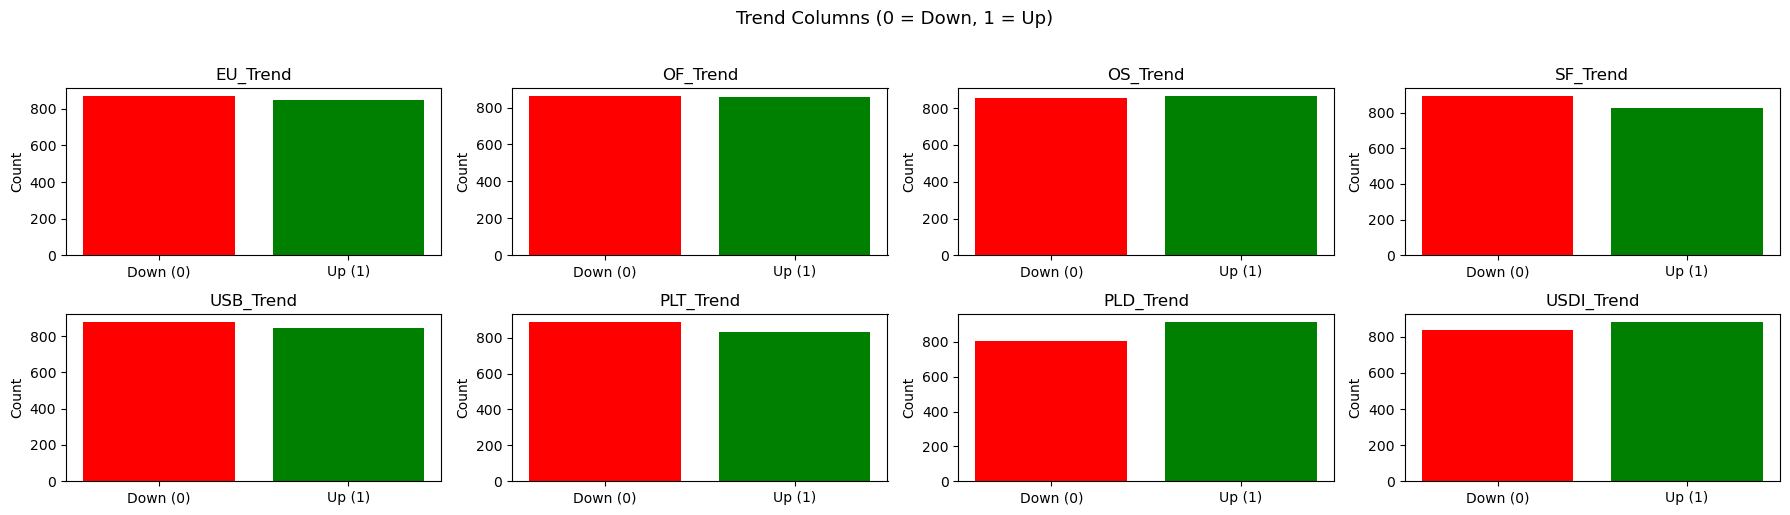

In [161]:
# Trend columns (binary categorical: 0 = Down, 1 = Up)
trend_cols = ['EU_Trend', 'OF_Trend', 'OS_Trend', 'SF_Trend', 'USB_Trend', 'PLT_Trend', 'PLD_Trend', 'USDI_Trend']

plt.figure(figsize=(18, 5))
for i, col in enumerate(trend_cols, 1):
    plt.subplot(2, 4, i)
    counts = df[col].value_counts()
    plt.bar(['Down (0)', 'Up (1)'], [counts.get(0, 0), counts.get(1, 0)], color=['red', 'green'])
    plt.title(col)
    plt.ylabel("Count")

plt.suptitle("Trend Columns (0 = Down, 1 = Up)", fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

### Year-wise and Monthly Analysis

- Year-wise boxplot shows price spread for each year
- Monthly line chart checks if gold has seasonal patterns
- **Result:** Price peaked in 2012 (~165$), dropped till 2015, stabilized at ~120$
- No strong monthly seasonality observed

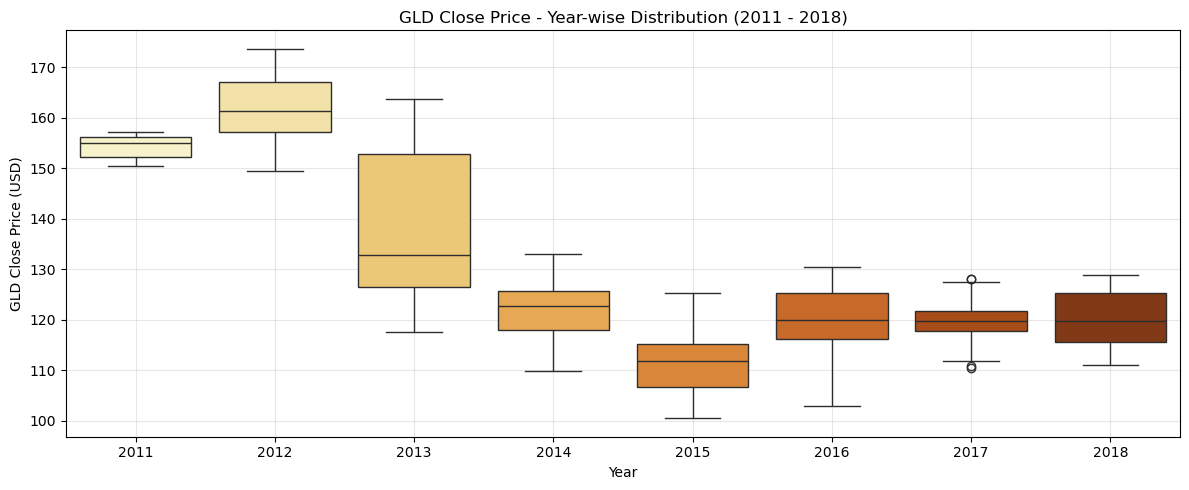

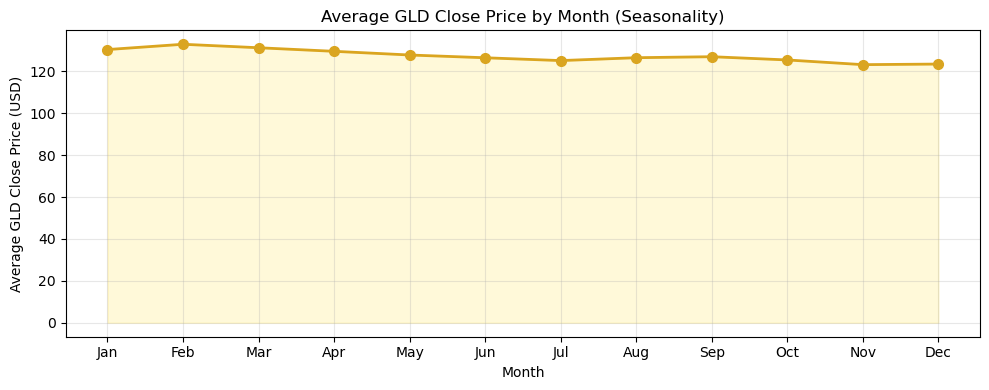

In [162]:
# extract year from Date column
df['Year'] = df['Date'].dt.year

# year-wise boxplot - shows price distribution for each year
plt.figure(figsize=(12, 5))
sns.boxplot(x='Year', y='Close', data=df, palette='YlOrBr')
plt.title('GLD Close Price - Year-wise Distribution (2011 - 2018)')
plt.xlabel('Year')
plt.ylabel('GLD Close Price (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# monthly average GLD price - shows seasonality
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Close'].mean()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(10, 4))
plt.plot(month_names, monthly_avg.values, marker='o', color='goldenrod', linewidth=2, markersize=7)
plt.fill_between(month_names, monthly_avg.values, alpha=0.15, color='gold')
plt.title('Average GLD Close Price by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average GLD Close Price (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Moving Average

- Daily prices fluctuate too much to see the real trend
- Calculated 7-day and 30-day rolling moving averages to smooth the line
- **Result:** 30-day MA clearly shows downtrend from 2012 to 2015, slow recovery after 2016

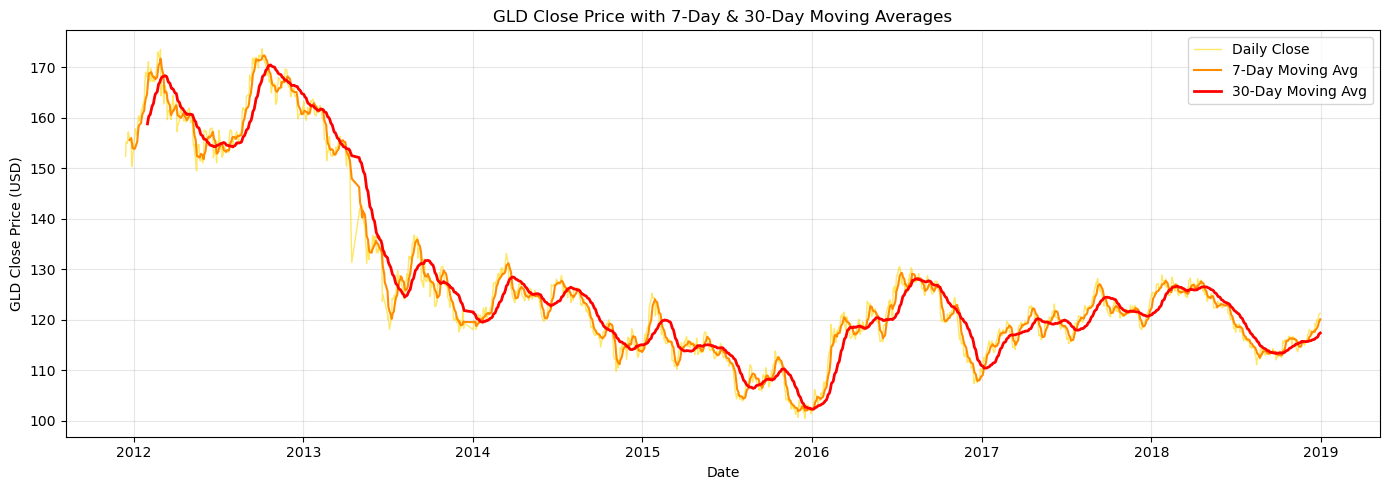

In [163]:
# calculate 7-day and 30-day rolling average of GLD Close
df['MA_7']  = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Close'],  color='gold',       linewidth=1,   alpha=0.6, label='Daily Close')
plt.plot(df['Date'], df['MA_7'],   color='darkorange',  linewidth=1.5, label='7-Day Moving Avg')
plt.plot(df['Date'], df['MA_30'],  color='red',         linewidth=2,   label='30-Day Moving Avg')
plt.title('GLD Close Price with 7-Day & 30-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('GLD Close Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Violin Plot

- Shows price distribution shape for each year (wider = more spread)
- More detailed than boxplot as it also shows density
- **Result:** 2013 has widest violin (unstable prices), post-2015 violins are narrow (stable prices)

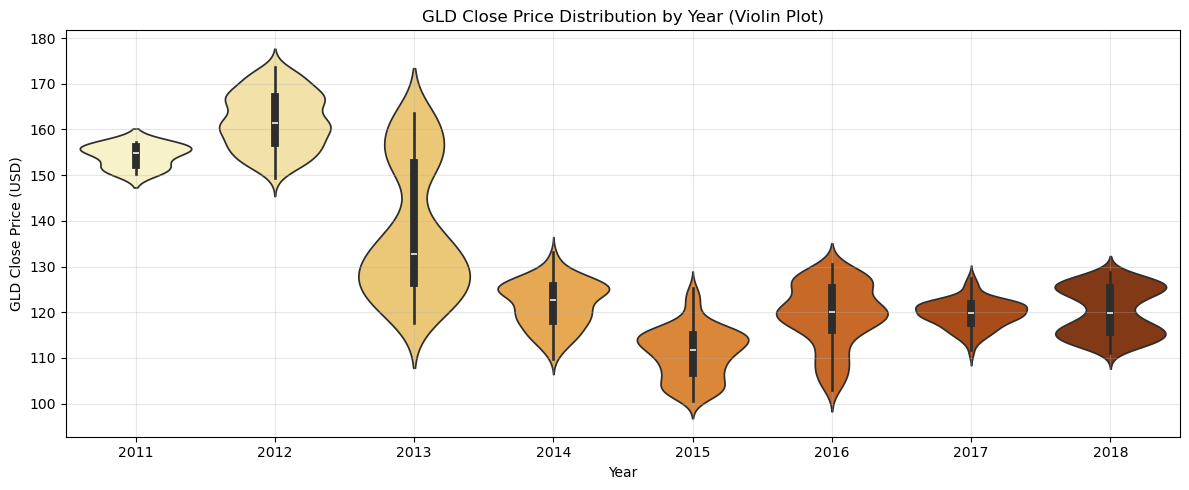

In [164]:
# violin plot - GLD Close price distribution by year
plt.figure(figsize=(12, 5))
sns.violinplot(x='Year', y='Close', data=df, palette='YlOrBr', inner='box')
plt.title('GLD Close Price Distribution by Year (Violin Plot)')
plt.xlabel('Year')
plt.ylabel('GLD Close Price (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Section 4: Outlier Detection

- Used IQR method: Outlier if value < Q1 - 1.5×IQR or > Q3 + 1.5×IQR
- Checked outlier count for all 12 key features
- Plotted distribution and boxplot before and after removal for `Close`
- **Result:** Very few outliers found - data was already mostly clean

In [165]:
# IQR for Close (GLD - target feature)
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
iqr = Q3 - Q1

print("Value of Q1   :", Q1)
print("Value of Q3   :", Q3)
print("IQR           :", iqr)

upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

print("Upper limit   :", upper_limit)
print("Lower limit   :", lower_limit)

Value of Q1   : 116.05250175
Value of Q3   : 128.470001
IQR           : 12.417499249999992
Upper limit   : 147.09624987499998
Lower limit   : 97.42625287500002


In [166]:
# number of outliers in each key feature
key_features = ['Close', 'SP_close', 'DJ_close', 'EU_Price', 'OF_Price',
                 'SF_Price', 'PLT_Price', 'PLD_Price', 'USDI_Price', 'GDX_Close', 'USO_Close', 'RHO_PRICE']

for col in key_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    n = df[(df[col] > upper) | (df[col] < lower)].shape[0]
    print(f"{col:15s} : {n} outliers")

Close           : 325 outliers
SP_close        : 0 outliers
DJ_close        : 0 outliers
EU_Price        : 0 outliers
OF_Price        : 0 outliers
SF_Price        : 73 outliers
PLT_Price       : 0 outliers
PLD_Price       : 29 outliers
USDI_Price      : 0 outliers
GDX_Close       : 306 outliers
USO_Close       : 0 outliers
RHO_PRICE       : 289 outliers


Original shape         : (1718, 85)
After removing outliers: (1393, 85)


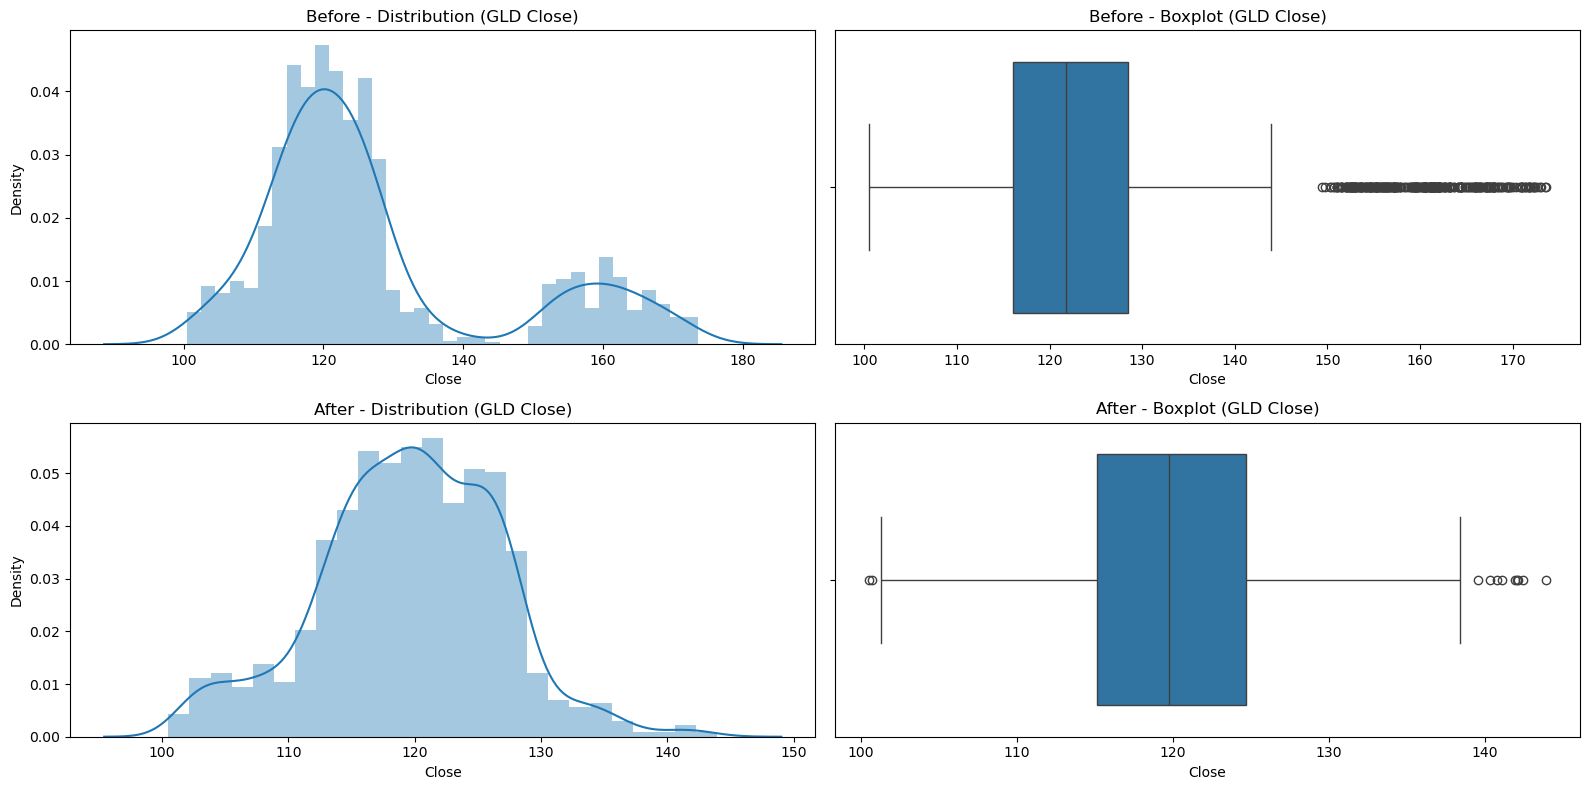

In [167]:
# Close (GLD): before vs after outlier removal
Q1_close = df['Close'].quantile(0.25)
Q3_close = df['Close'].quantile(0.75)
iqr_close = Q3_close - Q1_close
upper_close = Q3_close + 1.5 * iqr_close
lower_close = Q1_close - 1.5 * iqr_close

df_clean = df[(df['Close'] >= lower_close) & (df['Close'] <= upper_close)]
print("Original shape         :", df.shape)
print("After removing outliers:", df_clean.shape)

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.distplot(df['Close'])
plt.title("Before - Distribution (GLD Close)")

plt.subplot(2, 2, 2)
sns.boxplot(df['Close'], orient="h")
plt.title("Before - Boxplot (GLD Close)")

plt.subplot(2, 2, 3)
sns.distplot(df_clean['Close'])
plt.title("After - Distribution (GLD Close)")

plt.subplot(2, 2, 4)
sns.boxplot(df_clean['Close'], orient="h")
plt.title("After - Boxplot (GLD Close)")

plt.tight_layout()
plt.show()

## Section 5: Correlation Analysis

- Plotted correlation heatmap for all 12 key features
- Bar chart shows each feature's correlation with `Close` (GLD target)
- Scatter plots show individual feature vs GLD relationship
- Pairplot for top correlated features
- **Result:** `GDX_Close` has highest positive correlation (~0.97), `USDI_Price` has strong negative correlation

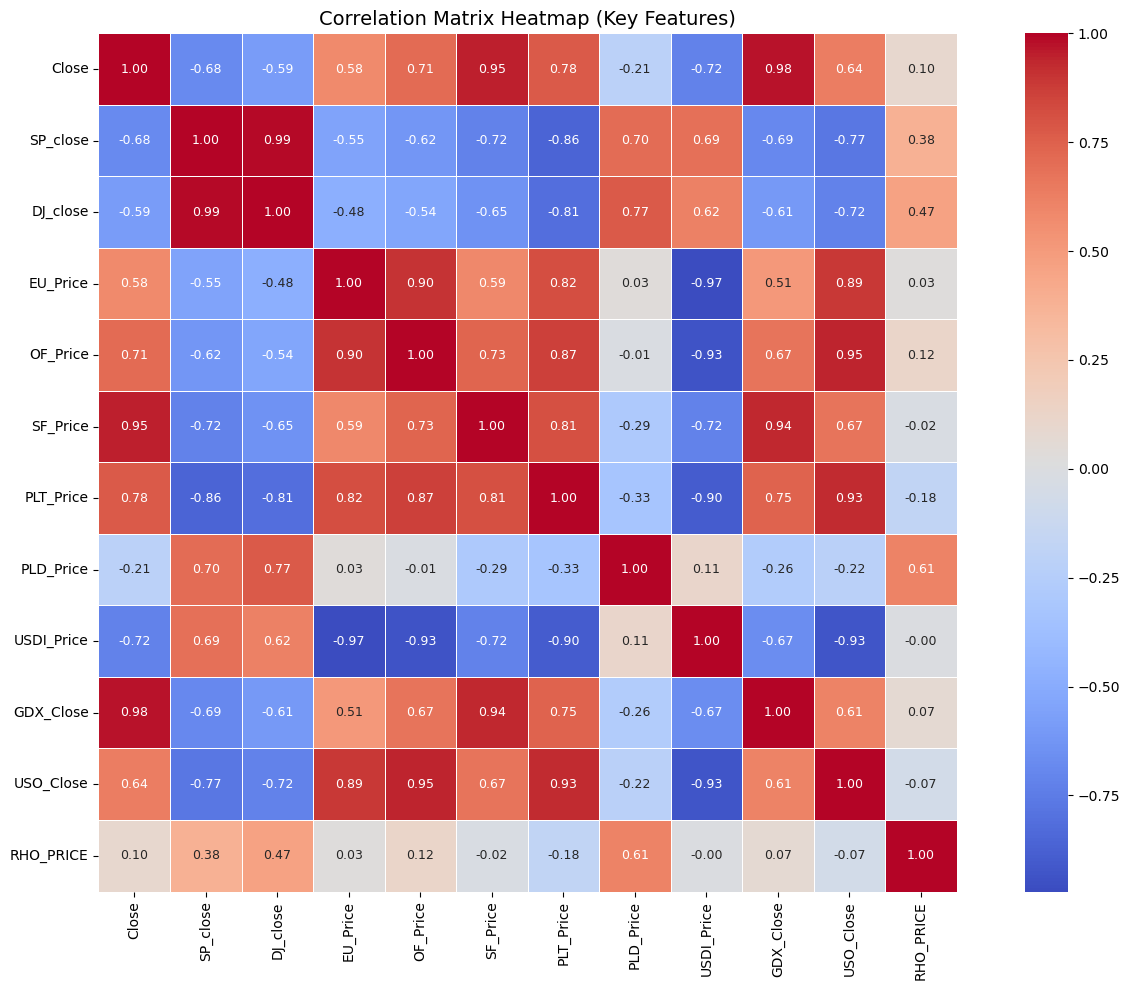

In [168]:
# Correlation Matrix of key features
key_features = ['Close', 'SP_close', 'DJ_close', 'EU_Price', 'OF_Price',
                 'SF_Price', 'PLT_Price', 'PLD_Price', 'USDI_Price', 'GDX_Close', 'USO_Close', 'RHO_PRICE']

corr_matrix = df[key_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            linewidths=0.5, annot_kws={'size': 9})
plt.title('Correlation Matrix Heatmap (Key Features)', fontsize=14)
plt.tight_layout()
plt.show()

Correlation with GLD Close:
 GDX_Close     0.975459
SF_Price      0.947420
PLT_Price     0.775861
OF_Price      0.710693
USO_Close     0.635675
EU_Price      0.581036
RHO_PRICE     0.095782
PLD_Price    -0.213179
DJ_close     -0.588411
SP_close     -0.684284
USDI_Price   -0.721569
Name: Close, dtype: float64


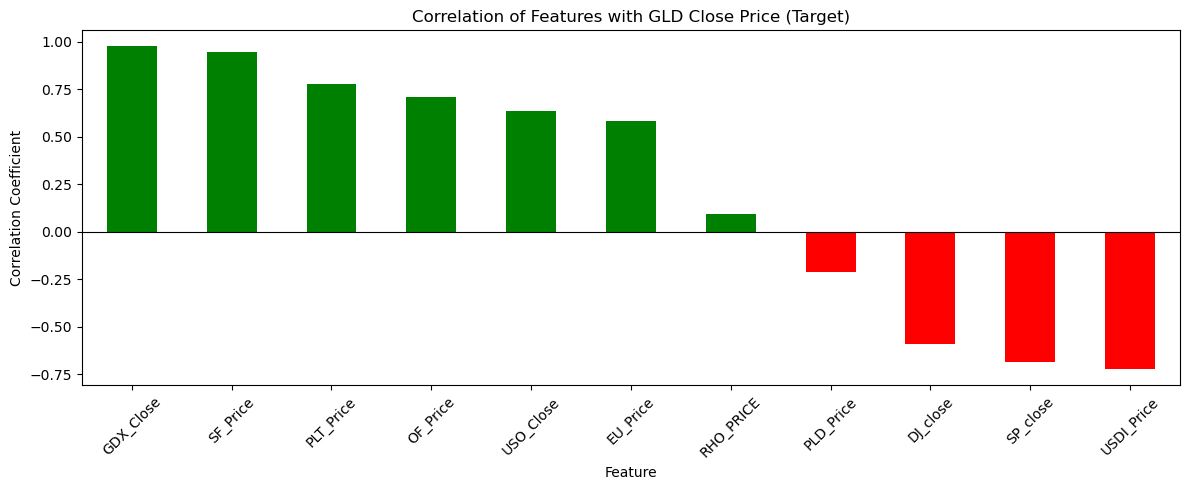

In [169]:
# Correlation of each feature with Close (GLD target)
corr_with_close = df[key_features].corr()['Close'].drop('Close').sort_values(ascending=False)
print("Correlation with GLD Close:\n", corr_with_close)

plt.figure(figsize=(12, 5))
corr_with_close.plot(kind='bar', color=['green' if x > 0 else 'red' for x in corr_with_close])
plt.title('Correlation of Features with GLD Close Price (Target)')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

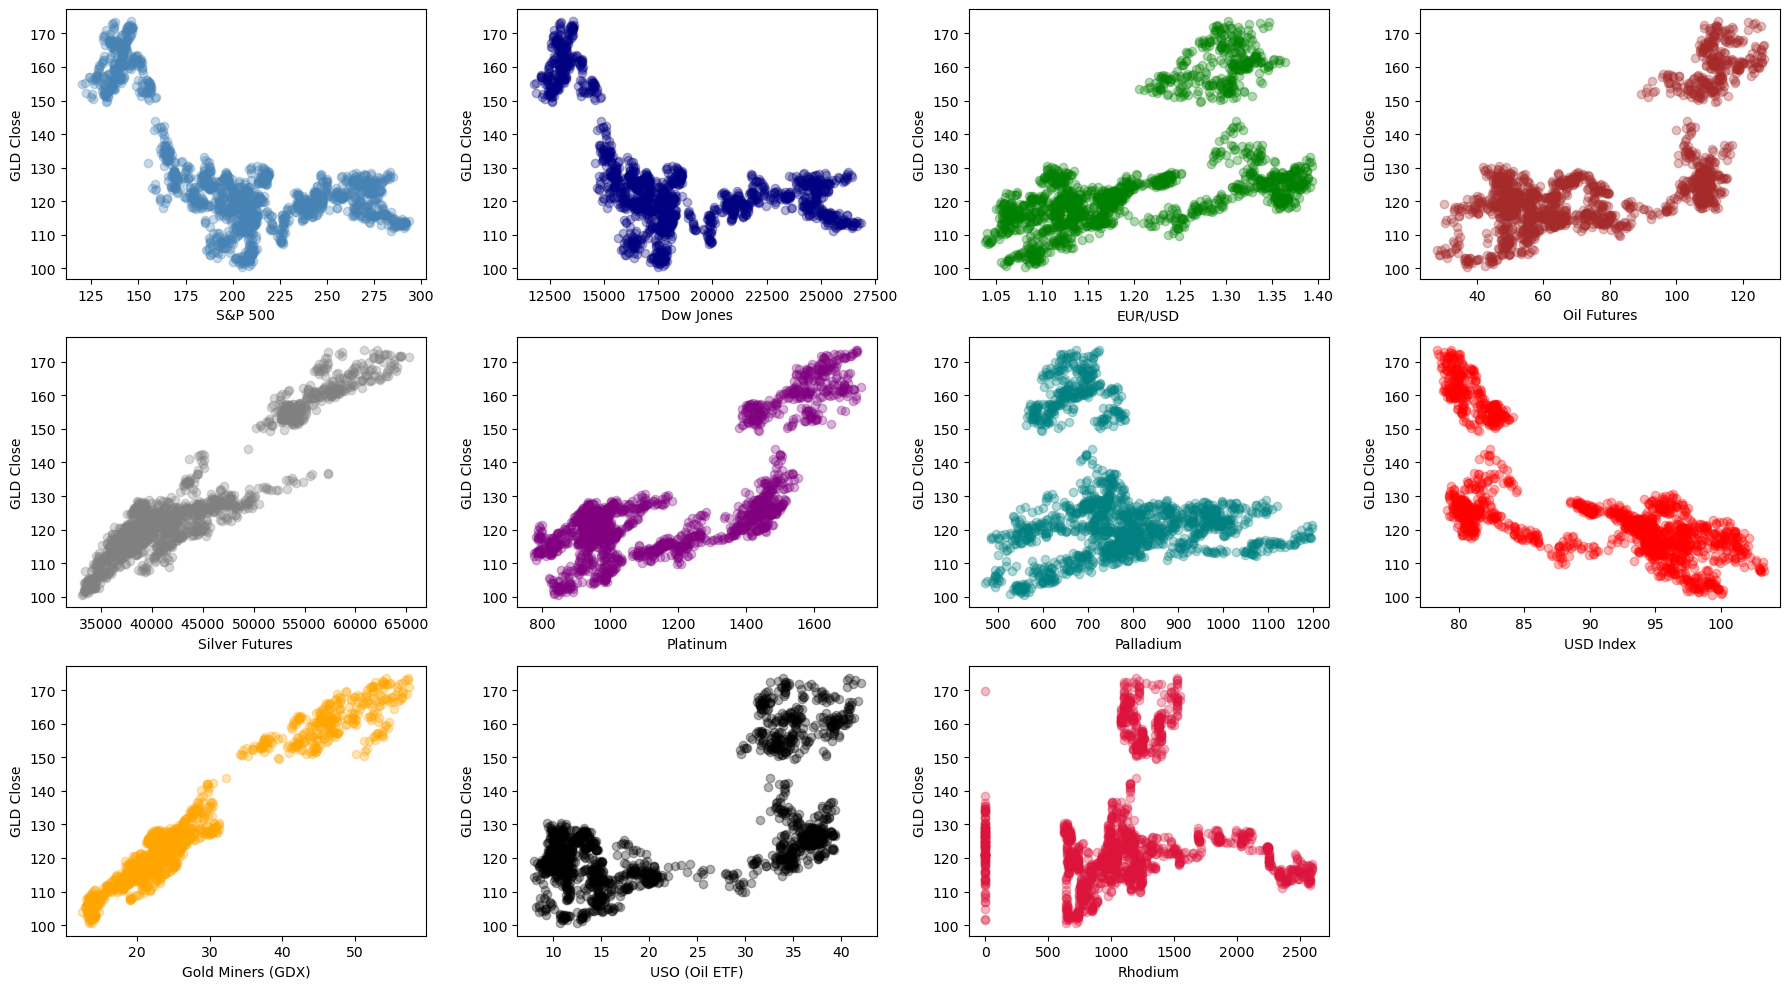

In [170]:
# scatter plots: each key feature vs GLD Close (target)
plt.figure(figsize=(18, 10))

plt.subplot(3, 4, 1)
plt.scatter(df['SP_close'], df['Close'], color='steelblue', alpha=0.3)
plt.xlabel("S&P 500"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 2)
plt.scatter(df['DJ_close'], df['Close'], color='navy', alpha=0.3)
plt.xlabel("Dow Jones"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 3)
plt.scatter(df['EU_Price'], df['Close'], color='green', alpha=0.3)
plt.xlabel("EUR/USD"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 4)
plt.scatter(df['OF_Price'], df['Close'], color='brown', alpha=0.3)
plt.xlabel("Oil Futures"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 5)
plt.scatter(df['SF_Price'], df['Close'], color='gray', alpha=0.3)
plt.xlabel("Silver Futures"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 6)
plt.scatter(df['PLT_Price'], df['Close'], color='purple', alpha=0.3)
plt.xlabel("Platinum"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 7)
plt.scatter(df['PLD_Price'], df['Close'], color='teal', alpha=0.3)
plt.xlabel("Palladium"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 8)
plt.scatter(df['USDI_Price'], df['Close'], color='red', alpha=0.3)
plt.xlabel("USD Index"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 9)
plt.scatter(df['GDX_Close'], df['Close'], color='orange', alpha=0.3)
plt.xlabel("Gold Miners (GDX)"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 10)
plt.scatter(df['USO_Close'], df['Close'], color='black', alpha=0.3)
plt.xlabel("USO (Oil ETF)"); plt.ylabel("GLD Close")

plt.subplot(3, 4, 11)
plt.scatter(df['RHO_PRICE'], df['Close'], color='crimson', alpha=0.3)
plt.xlabel("Rhodium"); plt.ylabel("GLD Close")

plt.tight_layout()
plt.show()

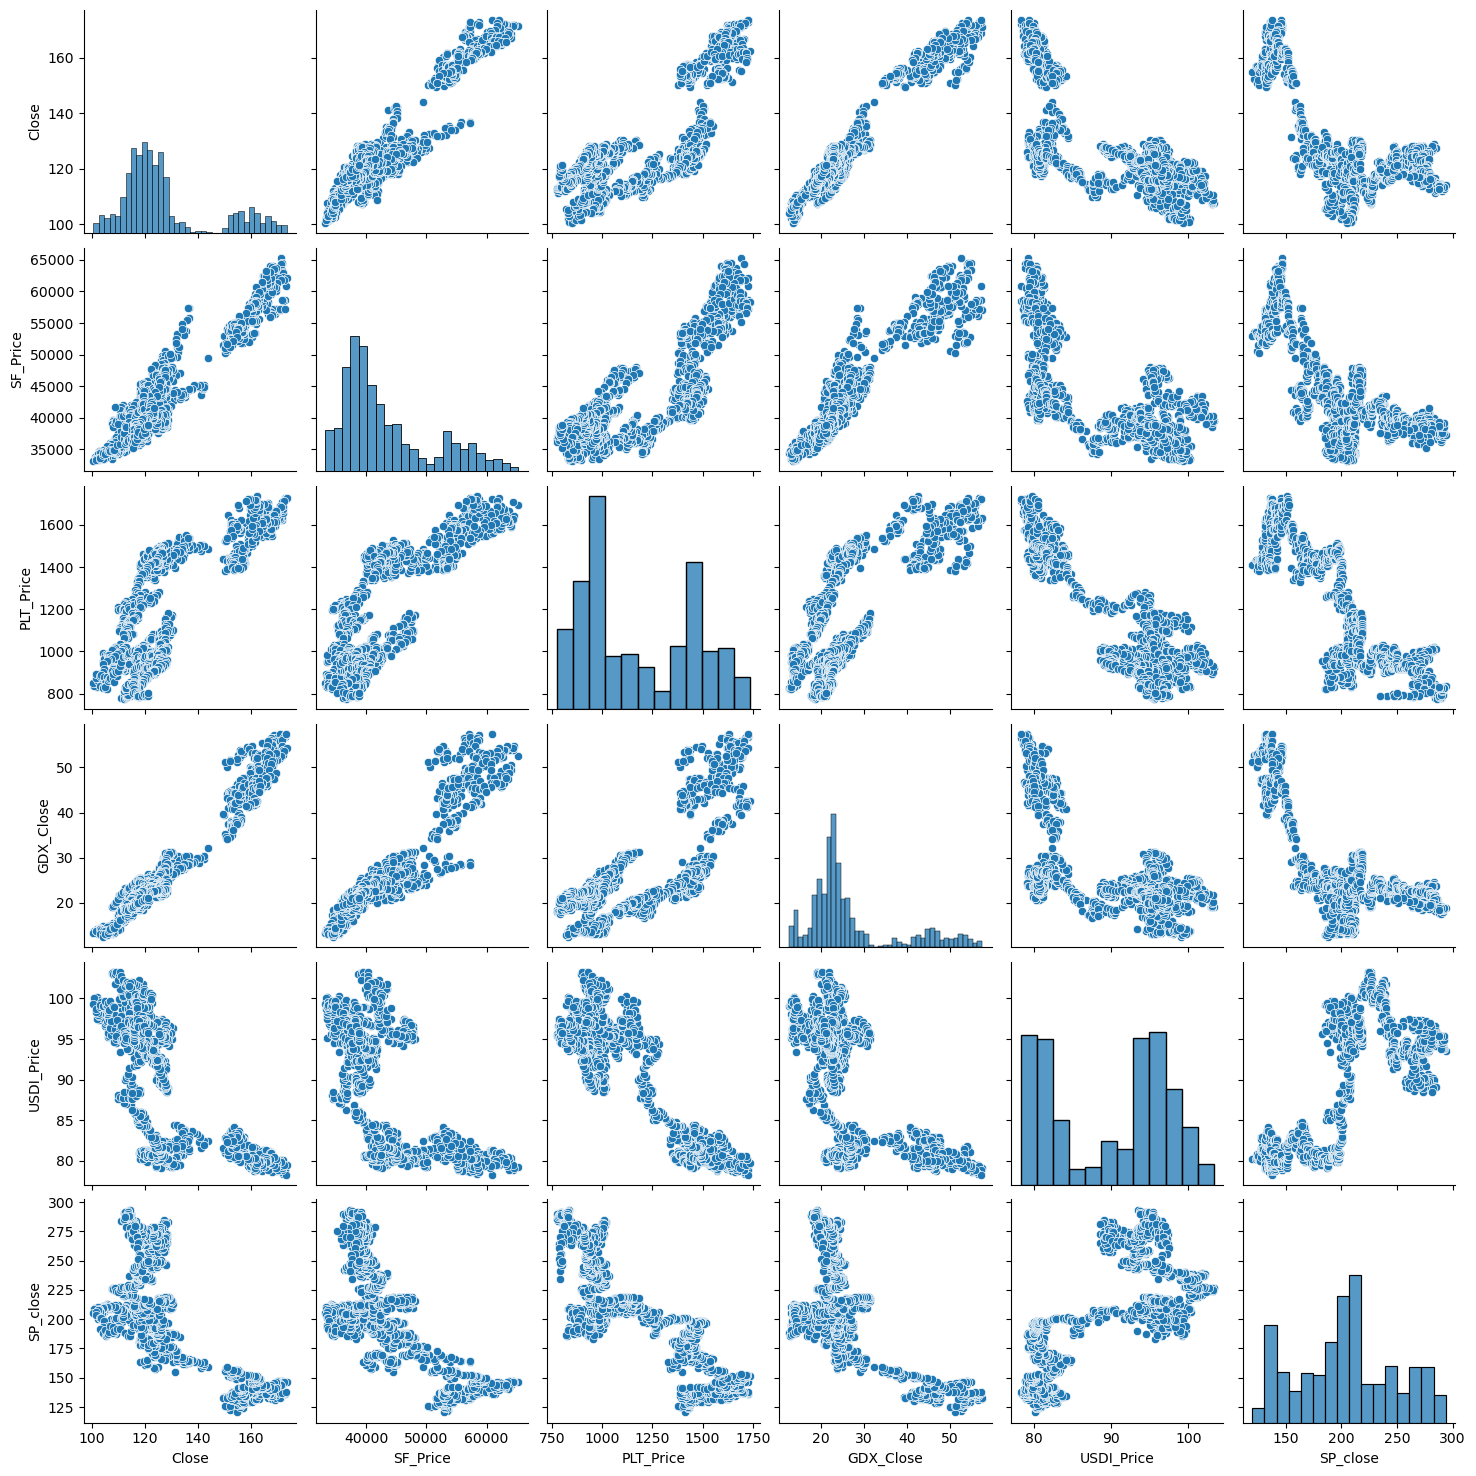

In [171]:
# pairplot of top correlated features with GLD Close
top_features = ['Close', 'SF_Price', 'PLT_Price', 'GDX_Close', 'USDI_Price', 'SP_close']
sns.pairplot(df[top_features])
plt.show()

### GLD vs Top Predictors

- Plotted GLD vs GDX_Close (strongest positive predictor)
- Plotted GLD vs USDI_Price (strongest negative predictor)
- **Result:** GDX moves with GLD almost exactly; USDI moves opposite to GLD - confirms correlation values

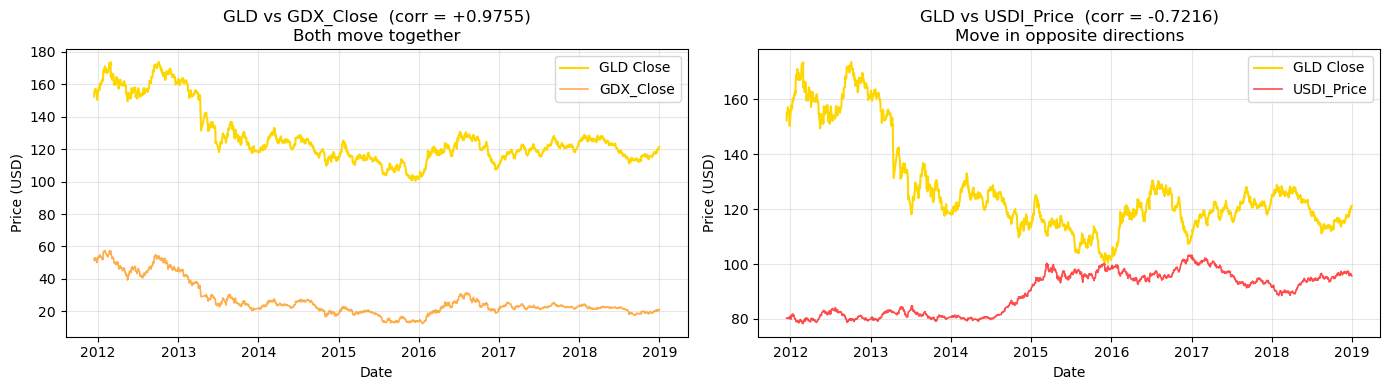

In [172]:
# GLD Close vs GDX_Close (strongest positive predictor)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(df['Date'], df['Close'],     color='gold',      linewidth=1.5, label='GLD Close')
plt.plot(df['Date'], df['GDX_Close'], color='darkorange', linewidth=1.2, alpha=0.7, label='GDX_Close')
plt.title('GLD vs GDX_Close  (corr = +0.9755)\nBoth move together')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)

# GLD Close vs USDI_Price (strongest negative predictor)
plt.subplot(1, 2, 2)
plt.plot(df['Date'], df['Close'],      color='gold', linewidth=1.5, label='GLD Close')
plt.plot(df['Date'], df['USDI_Price'], color='red',  linewidth=1.2, alpha=0.7, label='USDI_Price')
plt.title('GLD vs USDI_Price  (corr = -0.7216)\nMove in opposite directions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [173]:
# summary of the dataset
print("Total records:", df.shape[0])
print("Total features:", df.shape[1])
print("Date range:", df['Date'].min().date(), "to", df['Date'].max().date())
print("Missing values:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())
print()
print("GLD Close Price stats:")
print("  Min :", df['Close'].min())
print("  Max :", df['Close'].max())
print("  Mean:", df['Close'].mean())
print("  Std :", df['Close'].std())
print()

key_features = ['SP_close', 'DJ_close', 'EU_Price', 'OF_Price',
                 'SF_Price', 'PLT_Price', 'PLD_Price', 'USDI_Price', 'GDX_Close', 'USO_Close', 'RHO_PRICE']
corr_vals = df[key_features + ['Close']].corr()['Close'].drop('Close').sort_values(ascending=False)

print("Correlation of each feature with GLD Close:")
for feat, val in corr_vals.items():
    print(f"  {feat}: {val:.4f}")

Total records: 1718
Total features: 85
Date range: 2011-12-15 to 2018-12-31
Missing values: 35
Duplicates: 0

GLD Close Price stats:
  Min : 100.5
  Max : 173.610001
  Mean: 127.31948200349244
  Std : 17.536269080415405

Correlation of each feature with GLD Close:
  GDX_Close: 0.9755
  SF_Price: 0.9474
  PLT_Price: 0.7759
  OF_Price: 0.7107
  USO_Close: 0.6357
  EU_Price: 0.5810
  RHO_PRICE: 0.0958
  PLD_Price: -0.2132
  DJ_close: -0.5884
  SP_close: -0.6843
  USDI_Price: -0.7216


## Section 6: Prepare Data for Model Training

- Separated input features (`x` = 11 columns) and target (`y` = Close)
- Split: 80% training, 20% testing (`random_state=0`)
- Applied `StandardScaler` to bring all features to the same scale
- Scaling done on train set only, then applied to test set

In [174]:
# x = input features, y = target (GLD Close price)
x = df[['SP_close', 'DJ_close', 'EU_Price', 'OF_Price', 'SF_Price',
         'PLT_Price', 'PLD_Price', 'USDI_Price', 'GDX_Close', 'USO_Close', 'RHO_PRICE']].values
y = df['Close'].values

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1718, 11)
Shape of y : (1718,)


In [175]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("x_train :", x_train.shape)
print("x_test  :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)

x_train : (1374, 11)
x_test  : (344, 11)
y_train : (1374,)
y_test  : (344,)


In [176]:
# we apply scaling on input data only
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

## Section 7: Simple Linear Regression

- Used only 1 feature: `GDX_Close` (highest correlation with gold)
- Plotted regression line on training and test set
- Calculated MAE, MSE, RMSE
- **Result:** R² ≈ 0.949 - good score even with just one feature

In [177]:
# simple linear regression - 1 feature (GDX_Close) -> GLD Close
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x_gdx = df[['GDX_Close']].values
y_gdx = df['Close'].values

x_gdx_train, x_gdx_test, y_gdx_train, y_gdx_test = train_test_split(x_gdx, y_gdx, test_size=0.2, random_state=0)

lr_simple = LinearRegression()
lr_simple.fit(x_gdx_train, y_gdx_train)

y_pred_gdx_train = lr_simple.predict(x_gdx_train)
y_pred_gdx_test  = lr_simple.predict(x_gdx_test)

print("Simple LR Score (R²):", lr_simple.score(x_gdx_test, y_gdx_test))
print("Coefficient         :", lr_simple.coef_)
print("Intercept           :", lr_simple.intercept_)

Simple LR Score (R²): 0.9492576797193211
Coefficient         : [1.61873798]
Intercept           : 84.10193347191401


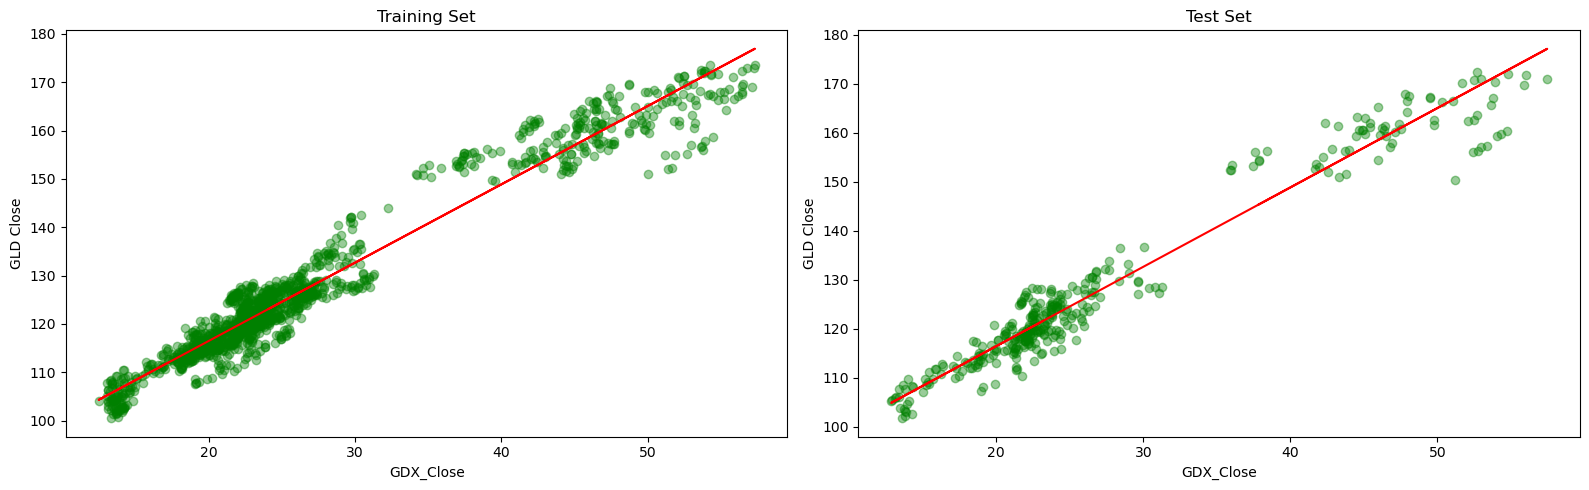

In [178]:
# visualising training set and test set result
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_gdx_train, y_gdx_train, color='green', alpha=0.4)
plt.plot(x_gdx_train, y_pred_gdx_train, color='red')
plt.title("Training Set")
plt.xlabel("GDX_Close")
plt.ylabel("GLD Close")

plt.subplot(1, 2, 2)
plt.scatter(x_gdx_test, y_gdx_test, color='green', alpha=0.4)
plt.plot(x_gdx_test, y_pred_gdx_test, color='red')
plt.title("Test Set")
plt.xlabel("GDX_Close")
plt.ylabel("GLD Close")

plt.tight_layout()
plt.show()

In [179]:
print("MAE :", mean_absolute_error(y_gdx_test, y_pred_gdx_test))
print("MSE :", mean_squared_error(y_gdx_test, y_pred_gdx_test))
print("RMSE:", np.sqrt(mean_squared_error(y_gdx_test, y_pred_gdx_test)))

MAE : 3.0381058554869105
MSE : 16.92680177756464
RMSE: 4.114219461521789


## Section 8: Multiple Linear Regression

- Used all 11 features as input
- Plotted actual vs predicted for both train and test set
- Calculated MAE, MSE, RMSE
- **Result:** R² ≈ 0.9838 - better than single feature model

In [180]:
# multiple linear regression - all features -> GLD Close
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

print("Multiple LR Score (R²):", lr.score(x_test, y_test))
print("Coefficients          :", lr.coef_)
print("Intercept             :", lr.intercept_)

Multiple LR Score (R²): 0.983805175429163
Coefficients          : [-10.23368306   8.55112346  -6.67885088   4.43487482   2.03300044
   6.62556228   0.37383034 -11.23551348   8.56739988 -12.08772922
   0.69859335]
Intercept             : 127.13700153857376


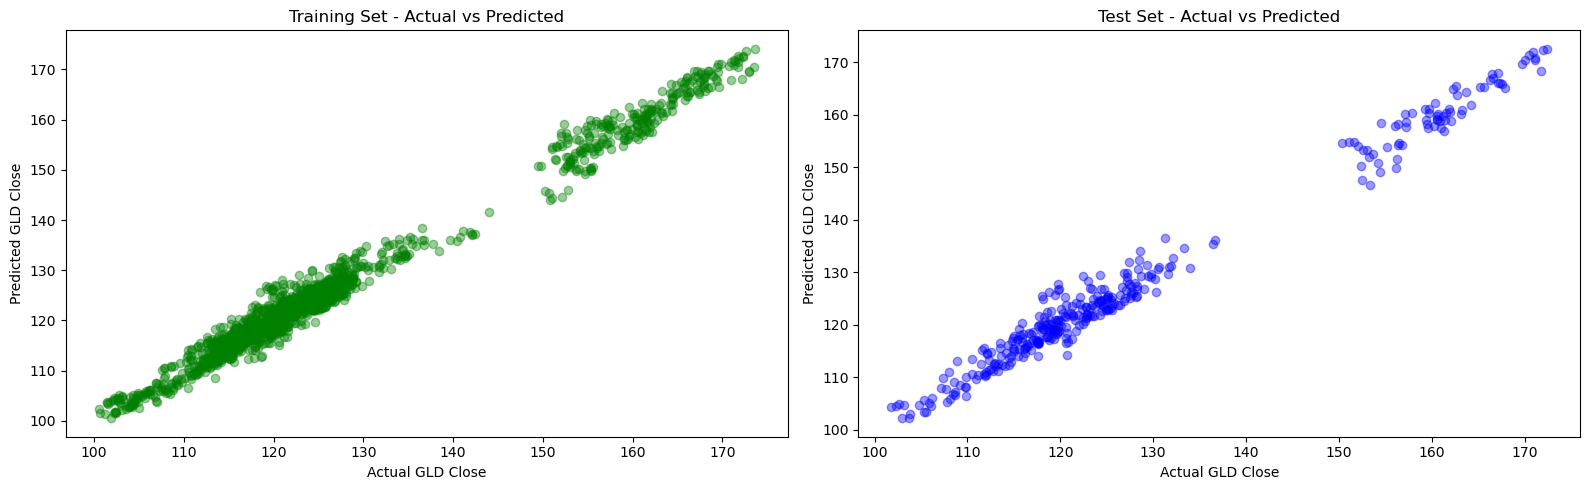

In [181]:
# actual vs predicted (multiple features)
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='green', alpha=0.4)
plt.title("Training Set - Actual vs Predicted")
plt.xlabel("Actual GLD Close")
plt.ylabel("Predicted GLD Close")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.4)
plt.title("Test Set - Actual vs Predicted")
plt.xlabel("Actual GLD Close")
plt.ylabel("Predicted GLD Close")

plt.tight_layout()
plt.show()

In [182]:
print("MAE :", mean_absolute_error(y_test, y_pred_test))
print("MSE :", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

MAE : 1.78038453375863
MSE : 5.402326575069312
RMSE: 2.3242905530654534


## Section 9: Decision Tree Regressor

- Trained with 2 criteria: `squared_error` and `friedman_mse`
- No assumption of linear relationship - splits data using conditions
- Calculated MAE, MSE, RMSE for both
- **Result:** R² ≈ 0.989 to 0.991 - better than Linear Regression

In [183]:
# decision tree regression - criterion = squared_error (gini equivalent for regression)
from sklearn.tree import DecisionTreeRegressor
dt_gini = DecisionTreeRegressor(criterion='squared_error', random_state=0)
dt_gini.fit(x_train, y_train)

y_pred_dt_gini = dt_gini.predict(x_test)

print("DT (squared_error) Score (R²):", dt_gini.score(x_test, y_test))
print("MAE :", mean_absolute_error(y_test, y_pred_dt_gini))
print("MSE :", mean_squared_error(y_test, y_pred_dt_gini))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_gini)))

DT (squared_error) Score (R²): 0.9894293493177457
MAE : 1.2130814040697677
MSE : 3.526194856062318
RMSE: 1.8778165128846636


In [184]:
# decision tree regression - criterion = friedman_mse (entropy equivalent for regression)
dt_entropy = DecisionTreeRegressor(criterion='friedman_mse', random_state=0)
dt_entropy.fit(x_train, y_train)

y_pred_dt_entropy = dt_entropy.predict(x_test)

print("DT (friedman_mse) Score (R²):", dt_entropy.score(x_test, y_test))
print("MAE :", mean_absolute_error(y_test, y_pred_dt_entropy))
print("MSE :", mean_squared_error(y_test, y_pred_dt_entropy))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_entropy)))

DT (friedman_mse) Score (R²): 0.9911354216042975
MAE : 1.1012209476744197
MSE : 2.957077258504331
RMSE: 1.7196154391329275


## Section 10: Random Forest Regressor

- Builds multiple decision trees and combines their output
- More accurate and less prone to overfitting than a single tree
- Used 100 trees (`n_estimators=100`)
- **Result:** R² = 0.9954 - better than Decision Tree

In [185]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("Random Forest Score (R²):", rf.score(x_test, y_test))
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("MSE :", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest Score (R²): 0.9954132892848152
MAE : 0.8376806530813963
MSE : 1.5300511024626287
RMSE: 1.236952344459005


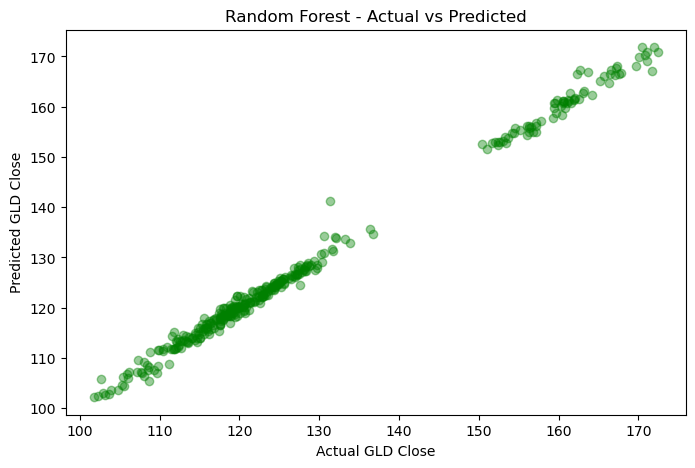

In [186]:
# actual vs predicted - random forest
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.4)
plt.xlabel("Actual GLD Close")
plt.ylabel("Predicted GLD Close")
plt.title("Random Forest - Actual vs Predicted")
plt.show()

## Section 11: K-Nearest Neighbors (KNN)

- Predicts by finding k nearest data points and averaging their values
- Does not learn a formula - just memorizes training data
- First trained with default k=5
- **Result:** Good score with k=5, but we tested more values to find the best k

In [187]:
# KNN regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print("KNN Score (R²):", knn.score(x_test, y_test))
print("MAE :", mean_absolute_error(y_test, y_pred_knn))
print("MSE :", mean_squared_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

KNN Score (R²): 0.9951284574273372
MAE : 0.8512209715116292
MSE : 1.6250663158938605
RMSE: 1.2747808893664279


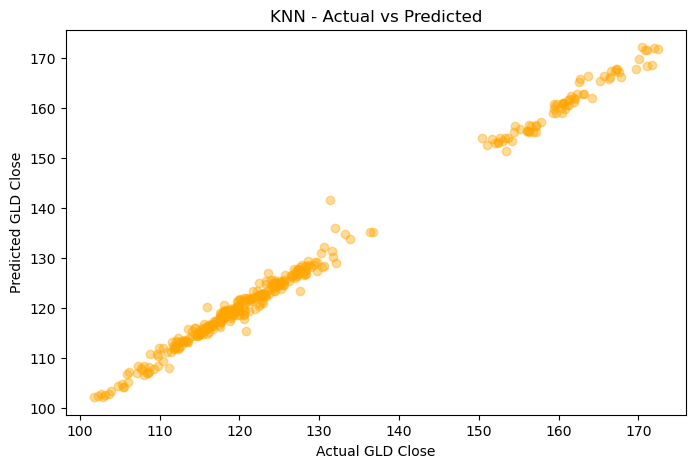

In [188]:
# actual vs predicted - KNN
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_knn, color='orange', alpha=0.4)
plt.xlabel("Actual GLD Close")
plt.ylabel("Predicted GLD Close")
plt.title("KNN - Actual vs Predicted")
plt.show()

### Finding the Best k Value (Elbow Method)

- Tested k from 1 to 20 and recorded R² for each
- Plotted elbow curve to find where R² is highest
- **Result:** k=2 gave best R² = 0.9962 - retrained KNN with k=2

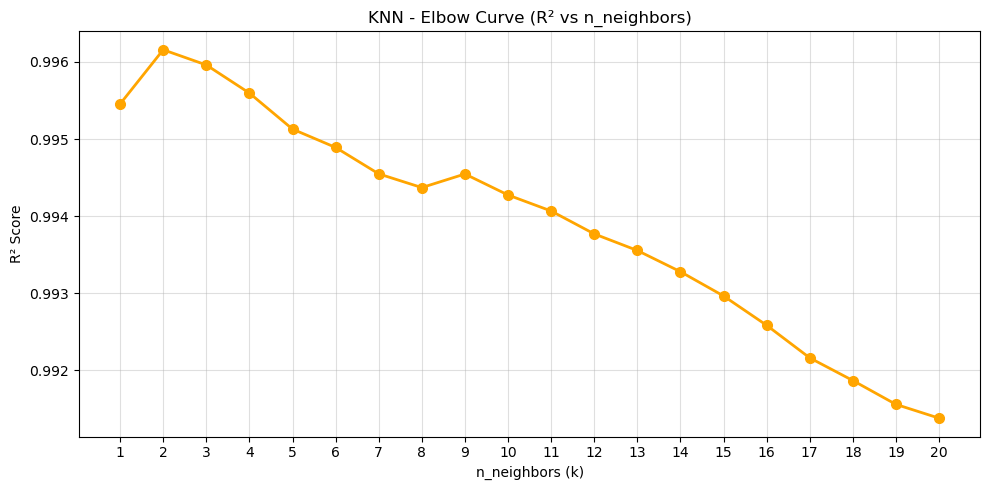

k    R² Score
--------------------
k= 1  0.995455
k= 2  0.996159
k= 3  0.995961
k= 4  0.995596
k= 5  0.995128
k= 6  0.994891
k= 7  0.994548
k= 8  0.994370
k= 9  0.994546
k=10  0.994273
k=11  0.994066
k=12  0.993768
k=13  0.993553
k=14  0.993278
k=15  0.992963
k=16  0.992582
k=17  0.992159
k=18  0.991865
k=19  0.991555
k=20  0.991376


In [189]:
# test k from 1 to 20, record R² for each
k_values = range(1, 21)
r2_scores = []

for k in k_values:
    knn_temp = KNeighborsRegressor(n_neighbors=k)
    knn_temp.fit(x_train, y_train)
    r2_scores.append(knn_temp.score(x_test, y_test))

# elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, r2_scores, marker='o', color='orange', linewidth=2, markersize=7)
plt.title("KNN - Elbow Curve (R² vs n_neighbors)")
plt.xlabel("n_neighbors (k)")
plt.ylabel("R² Score")
plt.xticks(k_values)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

# print all scores
print("k    R² Score")
print("-" * 20)
for k, r2 in zip(k_values, r2_scores):
    print(f"k={k:2d}  {r2:.6f}")

In [190]:
# find best k value
optimal_k = k_values[r2_scores.index(max(r2_scores))]
print("Optimal k:", optimal_k)
print("Best R² Score:", round(max(r2_scores), 6))

# train KNN again with best k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print()
print("KNN (optimal) Score (R²):", knn.score(x_test, y_test))
print("MAE :", mean_absolute_error(y_test, y_pred_knn))
print("MSE :", mean_squared_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

Optimal k: 2
Best R² Score: 0.996159

KNN (optimal) Score (R²): 0.9961586761341485
MAE : 0.7500000392441858
MSE : 1.281402334009018
RMSE: 1.1319904301755461


## Section 12: Model Comparison

- Compared all 5 models using R², MAE, MSE, RMSE
- Plotted R² bar chart for visual comparison
- **Result:** KNN (k=2) is the best model with R² = 0.9962 and lowest error

In [191]:
# compare all models
models = {
    'Simple LR (GDX)'    : y_pred_gdx_test,
    'Multiple LR'        : y_pred_test,
    'DT (squared_error)' : y_pred_dt_gini,
    'DT (friedman_mse)'  : y_pred_dt_entropy,
    'Random Forest'      : y_pred_rf,
    'KNN'                : y_pred_knn
}

y_test_mapping = {
    'Simple LR (GDX)'    : y_gdx_test,
    'Multiple LR'        : y_test,
    'DT (squared_error)' : y_test,
    'DT (friedman_mse)'  : y_test,
    'Random Forest'      : y_test,
    'KNN'                : y_test
}

results = []
for name, y_pred in models.items():
    y_actual = y_test_mapping[name]
    r2   = round(r2_score(y_actual, y_pred), 4)
    mae  = round(mean_absolute_error(y_actual, y_pred), 4)
    mse  = round(mean_squared_error(y_actual, y_pred), 4)
    rmse = round(np.sqrt(mean_squared_error(y_actual, y_pred)), 4)
    results.append({'Model': name, 'R²': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse})

result_df = pd.DataFrame(results).sort_values('R²', ascending=False).reset_index(drop=True)
result_df

,Model,R²,MAE,MSE,RMSE
0,KNN,0.9962,0.7500,1.2814,1.1320
1,Random Forest,0.9954,0.8377,1.5301,1.2370
2,DT (friedman_mse),0.9911,1.1012,2.9571,1.7196
3,DT (squared_error),0.9894,1.2131,3.5262,1.8778
4,Multiple LR,0.9838,1.7804,5.4023,2.3243
5,Simple LR (GDX),0.9493,3.0381,16.9268,4.1142


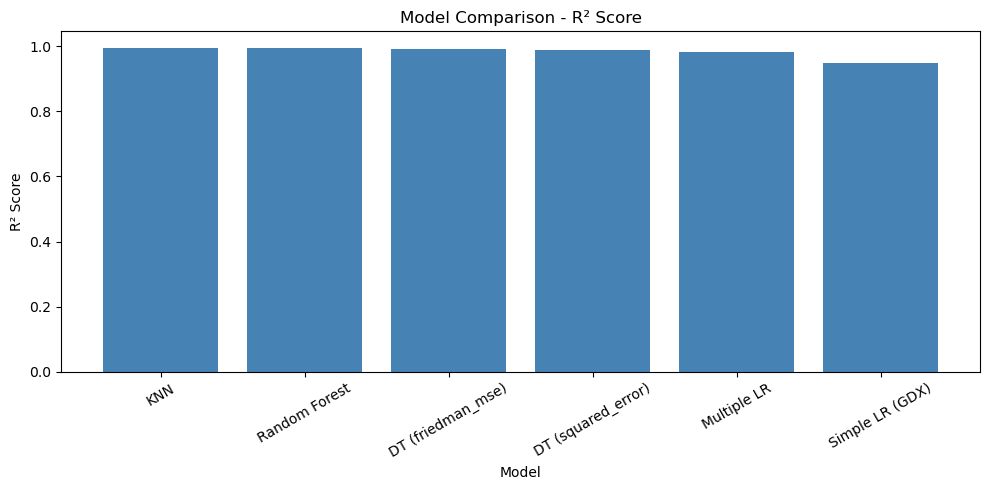

In [192]:
# bar chart comparison - R² score (higher is better)
plt.figure(figsize=(10, 5))
plt.bar(result_df['Model'], result_df['R²'], color='steelblue')
plt.title("Model Comparison - R² Score")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [193]:
# best model
best = result_df.iloc[0]
print("Best Model :", best['Model'])
print("R²         :", best['R²'])
print("MAE        :", best['MAE'])
print("MSE        :", best['MSE'])
print("RMSE       :", best['RMSE'])

Best Model : KNN
R²         : 0.9962
MAE        : 0.75
MSE        : 1.2814
RMSE       : 1.132


## Section 13: Feature Selection

- Used 2 methods: correlation with target and Random Forest importance scores
- Plotted both side by side for comparison
- **Result:** `GDX_Close` is the most important feature in both methods, `USDI_Price` is second

In [194]:
# method 1 - correlation with GLD Close
feature_names = ['SP_close', 'DJ_close', 'EU_Price', 'OF_Price', 'SF_Price',
                  'PLT_Price', 'PLD_Price', 'USDI_Price', 'GDX_Close', 'USO_Close', 'RHO_PRICE']

corr_vals = df[feature_names].corrwith(df['Close']).abs().sort_values(ascending=False)

print("Correlation with GLD Close (absolute):")
for f, v in corr_vals.items():
    print(f"  {f:12s} : {v:.4f}")

Correlation with GLD Close (absolute):
  GDX_Close    : 0.9755
  SF_Price     : 0.9474
  PLT_Price    : 0.7759
  USDI_Price   : 0.7216
  OF_Price     : 0.7107
  SP_close     : 0.6843
  USO_Close    : 0.6357
  DJ_close     : 0.5884
  EU_Price     : 0.5810
  PLD_Price    : 0.2132
  RHO_PRICE    : 0.0958


In [195]:
# method 2 - feature importance from random forest model
importances = rf.feature_importances_

print("Feature Importance (Random Forest):")
for f, imp in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"  {f:12s} : {imp:.4f}")

Feature Importance (Random Forest):
  GDX_Close    : 0.8539
  SP_close     : 0.0890
  SF_Price     : 0.0203
  DJ_close     : 0.0187
  USDI_Price   : 0.0093
  RHO_PRICE    : 0.0024
  EU_Price     : 0.0021
  PLT_Price    : 0.0014
  USO_Close    : 0.0013
  PLD_Price    : 0.0012
  OF_Price     : 0.0005


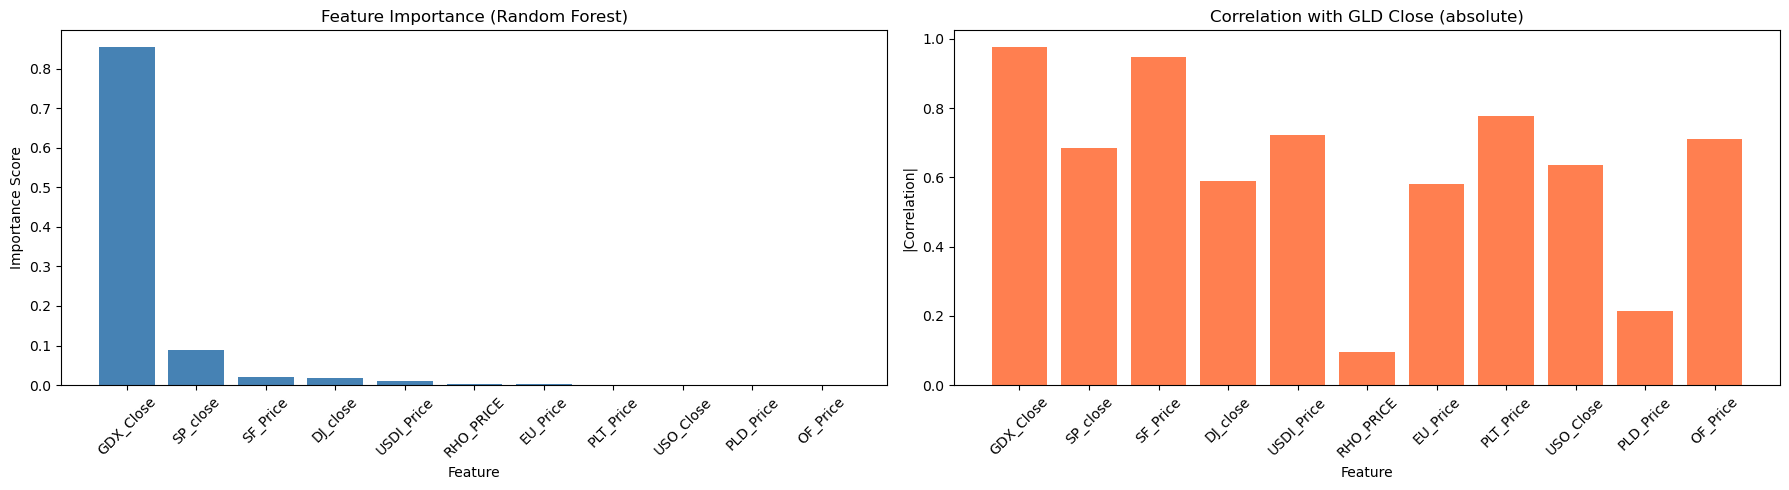

In [196]:
# plot both - feature importance and correlation
imp_sorted_idx = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
imp_names = [feature_names[i] for i in imp_sorted_idx]
imp_vals  = [importances[i]   for i in imp_sorted_idx]

corr_sorted = corr_vals.reindex(imp_names)

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.bar(imp_names, imp_vals, color='steelblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(corr_sorted.index, corr_sorted.values, color='coral')
plt.title("Correlation with GLD Close (absolute)")
plt.xlabel("Feature")
plt.ylabel("|Correlation|")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [197]:
# which features to use for prediction
best_model_name = result_df.iloc[0]['Model']
best_r2 = result_df.iloc[0]['R²']

print("Top 3 features by correlation:")
top3_corr = corr_vals.head(3)
for f, v in top3_corr.items():
    print(f"  {f}: {v:.4f}")

print()
print("Features used:", 'SP_close, DJ_close, EU_Price, OF_Price, SF_Price, PLT_Price, PLD_Price, USDI_Price, GDX_Close, USO_Close, RHO_PRICE')
print("Target: Close (GLD ETF)")
print("Best Model:", best_model_name, "| R²:", best_r2)

Top 3 features by correlation:
  GDX_Close: 0.9755
  SF_Price: 0.9474
  PLT_Price: 0.7759

Features used: SP_close, DJ_close, EU_Price, OF_Price, SF_Price, PLT_Price, PLD_Price, USDI_Price, GDX_Close, USO_Close, RHO_PRICE
Target: Close (GLD ETF)
Best Model: KNN | R²: 0.9962


## Section 14: Predict Gold Price

- Printed reference ranges of all 11 features for guidance
- Gave sample input values, scaled using the same scaler from training
- Predicted using the best model (KNN, k=2)
- Also showed predictions from all 5 models for comparison

In [198]:
# reference ranges from dataset (to help user enter realistic values)
print("Reference ranges from dataset:")
print(f"  SP_close   : {df['SP_close'].min():.2f}  to  {df['SP_close'].max():.2f}   (e.g. 140)")
print(f"  DJ_close   : {df['DJ_close'].min():.2f}  to  {df['DJ_close'].max():.2f}  (e.g. 150)")
print(f"  EU_Price   : {df['EU_Price'].min():.4f} to  {df['EU_Price'].max():.4f}  (e.g. 1.20)")
print(f"  OF_Price   : {df['OF_Price'].min():.2f}   to  {df['OF_Price'].max():.2f}  (e.g. 60)")
print(f"  SF_Price   : {df['SF_Price'].min():.2f}   to  {df['SF_Price'].max():.2f}  (e.g. 20)")
print(f"  PLT_Price  : {df['PLT_Price'].min():.2f}  to  {df['PLT_Price'].max():.2f}  (e.g. 1000)")
print(f"  PLD_Price  : {df['PLD_Price'].min():.2f}  to  {df['PLD_Price'].max():.2f}  (e.g. 800)")
print(f"  USDI_Price : {df['USDI_Price'].min():.2f}  to  {df['USDI_Price'].max():.2f}  (e.g. 95)")
print(f"  GDX_Close  : {df['GDX_Close'].min():.2f}  to  {df['GDX_Close'].max():.2f}  (e.g. 25)")
print(f"  USO_Close  : {df['USO_Close'].min():.2f}   to  {df['USO_Close'].max():.2f}  (e.g. 20)")
print(f"  RHO_PRICE  : {df['RHO_PRICE'].min():.2f}  to  {df['RHO_PRICE'].max():.2f}  (e.g. 1000)")
print()

Reference ranges from dataset:
  SP_close   : 120.29  to  293.58   (e.g. 140)
  DJ_close   : 11766.26  to  26828.39  (e.g. 150)
  EU_Price   : 1.0387 to  1.3934  (e.g. 1.20)
  OF_Price   : 27.88   to  126.22  (e.g. 60)
  SF_Price   : 33170.00   to  65292.00  (e.g. 20)
  PLT_Price  : 775.60  to  1737.60  (e.g. 1000)
  PLD_Price  : 470.45  to  1197.50  (e.g. 800)
  USDI_Price : 78.30  to  103.29  (e.g. 95)
  GDX_Close  : 12.47  to  57.47  (e.g. 25)
  USO_Close  : 7.96   to  42.01  (e.g. 20)
  RHO_PRICE  : 0.00  to  2600.00  (e.g. 1000)



In [199]:
# --- Sample input values (edit these to predict for different market conditions) ---
sp_close   = 185.0    # SP_close   range: 120.29  - 293.58
dj_close   = 17500.0  # DJ_close   range: 11766.26 - 26828.39
eu_price   = 1.15     # EU_Price   range: 1.0387  - 1.3934
of_price   = 55.0     # OF_Price   range: 27.88   - 126.22
sf_price   = 50000.0  # SF_Price   range: 33170.0  - 65292.0
plt_price  = 1100.0   # PLT_Price  range: 775.60  - 1737.60
pld_price  = 750.0    # PLD_Price  range: 470.45  - 1197.50
usdi_price = 92.0     # USDI_Price range: 78.30   - 103.29
gdx_close  = 25.0     # GDX_Close  range: 12.47   - 57.47
uso_close  = 18.0     # USO_Close  range: 7.96    - 42.01
rho_price  = 1200.0   # RHO_PRICE  range: 0.0     - 2600.0

print("Input values used for prediction:")
for name, val in zip(feature_names, [sp_close, dj_close, eu_price, of_price, sf_price,
                                      plt_price, pld_price, usdi_price, gdx_close, uso_close, rho_price]):
    print(f"  {name:<12}: {val}")

# prepare input and scale it
user_input = np.array([[sp_close, dj_close, eu_price, of_price, sf_price,
                         plt_price, pld_price, usdi_price, gdx_close, uso_close, rho_price]])
user_input_scaled = sc.transform(user_input)

# predict using best model
predicted_close = knn.predict(user_input_scaled)[0]

print()
print("  Predicted GLD Close Price : $", round(predicted_close, 2))

Input values used for prediction:
  SP_close    : 185.0
  DJ_close    : 17500.0
  EU_Price    : 1.15
  OF_Price    : 55.0
  SF_Price    : 50000.0
  PLT_Price   : 1100.0
  PLD_Price   : 750.0
  USDI_Price  : 92.0
  GDX_Close   : 25.0
  USO_Close   : 18.0
  RHO_PRICE   : 1200.0

  Predicted GLD Close Price : $ 126.81


In [200]:
# prediction from all models for the same input
print("Predictions from all models:")
print()
print(f"  Simple LR  (GDX_Close only) : $ {lr_simple.predict([[gdx_close]])[0]:.2f}")
print(f"  Multiple LR                 : $ {lr.predict(user_input_scaled)[0]:.2f}")
print(f"  DT (squared_error)          : $ {dt_gini.predict(user_input_scaled)[0]:.2f}")
print(f"  DT (friedman_mse)           : $ {dt_entropy.predict(user_input_scaled)[0]:.2f}")
print(f"  Random Forest               : $ {rf.predict(user_input_scaled)[0]:.2f}")
print(f"  KNN                         : $ {knn.predict(user_input_scaled)[0]:.2f}")
print()
print("Best Model Used               :", result_df.iloc[0]['Model'])
print("Final Predicted GLD Close     : $", round(knn.predict(user_input_scaled)[0], 2))

Predictions from all models:

  Simple LR  (GDX_Close only) : $ 124.57
  Multiple LR                 : $ 130.18
  DT (squared_error)          : $ 129.77
  DT (friedman_mse)           : $ 126.50
  Random Forest               : $ 125.64
  KNN                         : $ 126.81

Best Model Used               : KNN
Final Predicted GLD Close     : $ 126.81


## Conclusion

- We performed complete EDA on the FINAL_USO.csv dataset (1718 rows, 81 columns)
- Data was clean - no missing values, no duplicates, very few outliers
- `GDX_Close` has the strongest positive correlation with gold price (~0.97)
- `USDI_Price` has strong negative correlation - when dollar rises, gold falls
- We trained 5 regression models: Simple LR, Multiple LR, Decision Tree, Random Forest, KNN
- **Best Model: KNN (k=2) with R² = 0.9962** - highest accuracy and lowest error
- Feature selection confirmed `GDX_Close` and `USDI_Price` as the most important predictors